# Project 7 

In this project, you will implement the the clustering techniques that you've learned this week. 

#### Step 1: Load the python libraries that you will need for this project 

In [12]:
from sklearn.decomposition import PCA 
import time, csv, sqlite3
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import psycopg2 as psy
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier as KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_score,classification_report
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, LinearRegression
from BeautifulSoup import BeautifulSoup
from sklearn import cluster, datasets, preprocessing, metrics
from sklearn.cluster import DBSCAN
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

%matplotlib inline

#### Step 2: Examine your data 

In [13]:
cancellations=pd.read_csv("../assets/airport_cancellations.csv")
operations=pd.read_csv("../assets/Airport_operations.csv")
airports=pd.read_csv("../assets/airports.csv")

In [14]:
cancellations.describe()

,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
count,805.000000,805.000000,805.000000,805.000000,805.000000
mean,2008.986335,1292.038509,1333.124224,173.315528,169.413665
std,3.158116,1835.961943,1975.224868,172.345539,228.521615
min,2004.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,349.000000,314.000000,62.000000,41.000000
50%,2009.000000,663.000000,642.000000,110.000000,84.000000
75%,2012.000000,1472.000000,1523.000000,236.000000,190.000000
max,2014.000000,16618.000000,17571.000000,1064.000000,1948.000000


In [15]:
operations.describe()

,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
count,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000
mean,2009.028537,108257.063020,107815.561237,0.764119,0.714283,0.754281,13.561403,13.703389,3.519750,16.249964,2.921237,1.348894,3.330773,14.013222
std,3.156497,98278.401526,97916.908601,0.093361,0.101271,0.082302,4.746563,3.792181,2.391278,5.353012,1.201453,0.882252,1.026872,4.482215
min,2004.000000,261.000000,259.000000,0.246700,0.245700,0.324100,5.350000,7.040000,0.000000,6.290000,0.950000,0.000000,1.230000,6.330000
25%,2006.000000,37653.000000,37502.000000,0.745700,0.684800,0.737500,10.910000,11.260000,2.210000,12.950000,2.050000,0.800000,2.630000,11.300000
50%,2009.000000,72043.000000,71254.000000,0.782500,0.737200,0.768300,12.640000,12.810000,2.990000,15.220000,2.650000,1.080000,3.160000,13.080000
75%,2012.000000,162913.000000,160775.000000,0.809800,0.772200,0.796500,14.950000,15.650000,4.080000,17.940000,3.620000,1.740000,3.860000,15.250000
max,2014.000000,491826.000000,486799.000000,0.909700,0.897400,0.880300,40.800000,35.760000,18.940000,40.870000,7.820000,6.180000,7.520000,34.880000


In [16]:
cancellations.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0
2,ABQ,2006.0,392.0,329.0,71.0,124.0
3,ABQ,2007.0,366.0,304.0,107.0,45.0
4,ABQ,2008.0,333.0,300.0,79.0,42.0


In [17]:
operations.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [18]:
airports.head()

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088.0,X64,PATILLAS,NaN,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.019330,No
2,2886.0,PSE,MERCEDITA,Aeropuerto Mercedita,Airport,ASO,#NAME?,PONCE,PR,Public Use,18.008306,-66.563028,Yes
3,2879.0,VQS,ANTONIO RIVERA RODRIGUEZ,Aeropuerto Antonio Rivera Rodr�guez,Airport,ASO,#NAME?,ISLA DE VIEQUES,PR,Public Use,18.134811,-65.493617,Yes
4,2883.0,X63,HUMACAO,Aeropuerto Regional De Humacao,Airport,ASO,#NAME?,HUMACAO,PR,Public Use,18.138017,-65.800718,Yes


In [19]:


print "cancellations:"
print cancellations.columns
print 
print "operations:"
print operations.columns
print 
print "airports:"
print airports.columns

cancellations:
Index([u'Airport', u'Year', u'Departure Cancellations',
       u'Arrival Cancellations', u'Departure Diversions',
       u'Arrival Diversions'],
      dtype='object')

operations:
Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay'],
      dtype='object')

airports:
Index([u'Key', u'LocID', u'AP_NAME', u'ALIAS', u'Facility Type', u'FAA REGION',
       u'COUNTY', u'CITY', u'STATE', u'AP Type', u'Latitude', u'Longitude',
       u'Boundary Data Available'],
      dtype='object')


### Intro: Write a problem statement / aim for this project

### Part 1: Create a PostgreSQL database 

In [20]:
cancellations=pd.read_csv("../assets/airport_cancellations.csv")
operations=pd.read_csv("../assets/Airport_operations.csv")
airports=pd.read_csv("../assets/airports.csv")

#### 1. Let's create a database where we can house our airport data

In [21]:
# con = sqlite3.connect(":memory:")
# cur = con.cursor()
# cur.execute("CREATE TABLE cancellations ('Airport', 'Year', 'Departure Cancellations',\
#        'Arrival Cancellations', 'Departure Diversions',\
#        'Arrival Diversions');")

# with open("../assets/airport_cancellations.csv",'rb') as fin:
#     dr = csv.DictReader(fin)
#     to_db = [(i['Airport'], i['Year'], i['Departure Cancellations', i['Arrival Cancellations'],\
#         ['Departure Diversions'],'Arrival Diversions']) for i in dr]

# cur.executemany("INSERT INTO t ('Airport', 'Year', 'Departure Cancellations',\
#        'Arrival Cancellations', 'Departure Diversions',\
#        'Arrival Diversions') VALUES (?, ?, ?, ?, ?, ?);", to_db)
# con.commit()
# con.close()

Load our csv files into tables

Join airport_cancellations.csv and airports.csv into one table

Query the database for our intial data

#### 1.2 What are the risks and assumptions of our data? 

### Part 2: Exploratory Data Analysis

#### 2.1 Plot and Describe the Data

In [22]:
df=pd.merge(operations,cancellations,left_on=["airport",'year'],right_on=['Airport',"Year"]).merge(\
                airports[["LocID","STATE","AP Type"]], left_on=["airport"], right_on=["LocID"],how='left')
df=df.groupby(["Airport"])[[u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay',
       u'Departure Cancellations', u'Arrival Cancellations',
       u'Departure Diversions', u'Arrival Diversions']].mean()
df=df.reset_index()
df["Total Flights"]=df["departures for metric computation"]+df["arrivals for metric computation"]
df=df.merge(airports,left_on="Airport",right_on="LocID")

In [23]:
print len(df)

74


In [24]:
df.head().T

,0,1,2,3,4
Airport,ABQ,ANC,ATL,AUS,BDL
departures for metric computation,44830.5,67627.5,469004,53456,45903.1
arrivals for metric computation,44947.3,63188.5,465717,53424.4,45482
percent on-time gate departures,0.8018,0.7966,0.771836,0.7932,0.807273
percent on-time airport departures,0.775791,0.770364,0.633418,0.769582,0.765327
percent on-time gate arrivals,0.786673,0.778991,0.771736,0.7519,0.761436
average_gate_departure_delay,10.9645,14.7691,13.4773,11.8936,11.7664
average_taxi_out_time,10.2118,12.3173,19.7682,11.5618,13.0527
average taxi out delay,2.31909,1.97727,7.77727,2.27273,3.10636
average airport departure delay,12.5345,16.0064,20.0691,13.4445,14.0118


It would be smart to create bins for the size of the airport. 4 bins should suffice, as there are Major Hubs, Large Sized Airports, Mid Sized Airports, and Small Airports. Appropriate Bin dividers would be 200000, 400000, & 750000.

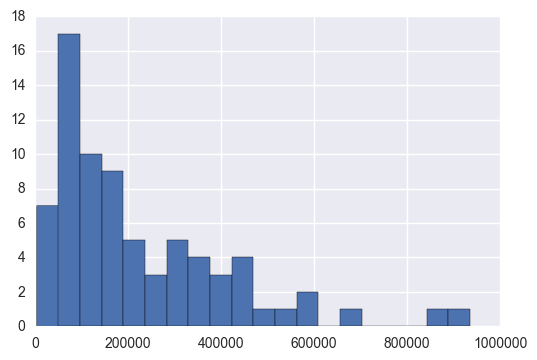

In [25]:
plt.hist(df["Total Flights"], bins=20)
plt.show()

In [26]:
def airport_size_binner(flights):
    return_value="XL"
    if flights<200000:
        return_value="S"
    elif flights<400000:
        return_value="M"
    elif flights<750000:
        return_value="L"
    return return_value
    
df["Size Category"]=df["Total Flights"].apply(lambda x: airport_size_binner(x))

In [27]:
df.describe()

,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,...,average block delay,average gate arrival delay,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,Total Flights,Key,Latitude,Longitude
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,111683.885815,111224.903804,0.779430,0.727801,0.767186,12.844596,13.803303,3.651183,15.628055,2.859227,...,3.278973,13.386469,1277.896777,1318.590953,171.437339,167.393669,222908.789619,1697.729730,36.471686,-95.161801
std,97527.576902,97189.725501,0.046186,0.068721,0.042550,2.641054,3.700279,2.153112,3.935878,0.977156,...,0.775148,2.774716,1711.676097,1848.336382,168.615669,216.289629,194713.023372,1010.060602,6.686507,20.761767
min,1734.857143,1696.142857,0.583536,0.530682,0.583164,6.238571,8.190000,1.236364,7.222857,1.406364,...,1.977273,8.060909,3.166667,3.500000,0.571429,0.142857,3431.000000,246.000000,18.439295,-157.922429
25%,41199.204545,40316.522727,0.760214,0.692255,0.750389,11.451818,11.514091,2.330682,13.330455,2.168409,...,2.759091,11.382273,334.454545,320.113636,67.386364,43.272727,81515.727273,769.250000,33.031191,-112.003131
50%,78108.090909,78003.363636,0.789573,0.742036,0.770023,12.600000,12.989545,2.905909,15.130909,2.730455,...,3.108636,13.015455,692.181818,668.636364,108.818182,84.818182,156111.454545,1516.000000,37.670139,-87.901870
75%,160396.977273,159109.840909,0.804575,0.772300,0.791675,14.473409,15.526136,4.177500,16.977955,3.285682,...,3.675000,14.475227,1475.772727,1758.068182,230.318182,197.272727,318815.090909,2500.000000,40.793534,-80.172771
max,469004.000000,465716.909091,0.888100,0.881027,0.864709,21.885455,28.612727,11.985455,27.867273,6.354545,...,5.265455,22.568182,10892.000000,11730.454545,884.454545,1221.818182,934720.909091,3575.000000,61.174083,-66.002004


In [28]:
airports.head(1)

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes


In [29]:
operations.head(1)

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.803,0.7809,0.7921,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87


In [30]:
cancellations.head(1)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0


In [31]:
operations.columns

Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay'],
      dtype='object')

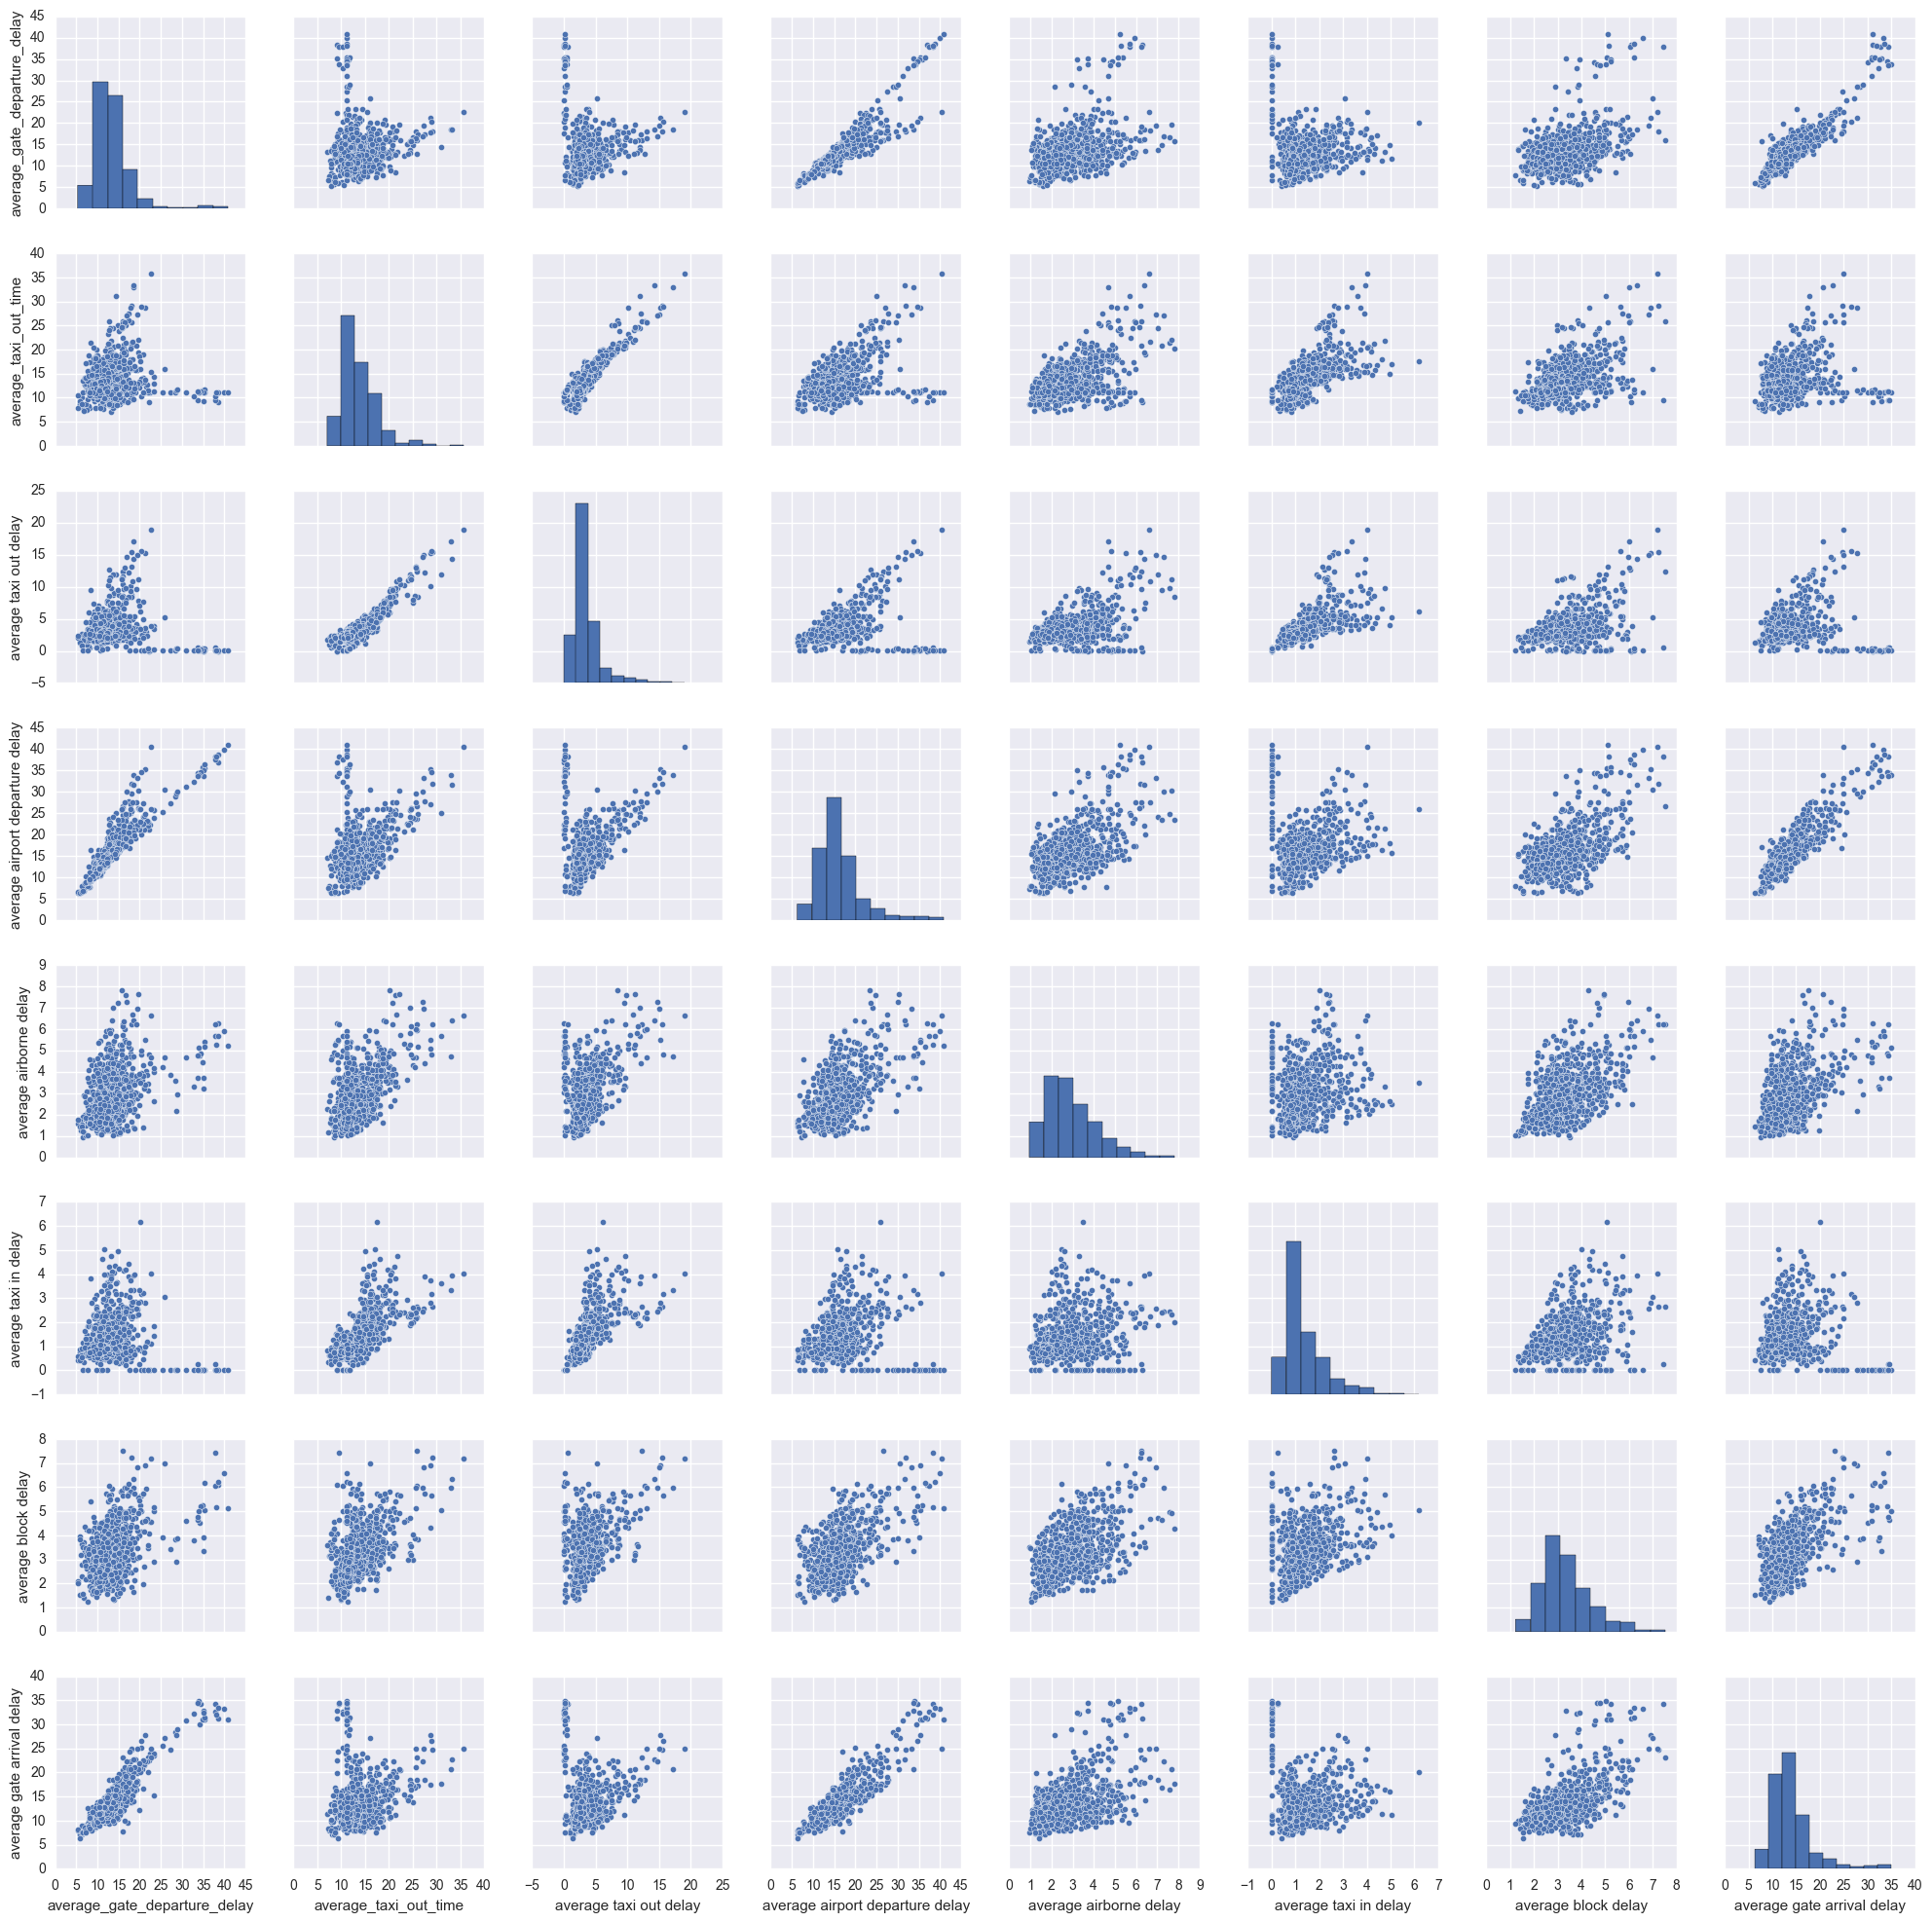

In [32]:
sns.pairplot(operations[[u'average_gate_departure_delay', u'average_taxi_out_time',\
       u'average taxi out delay', u'average airport departure delay',\
       u'average airborne delay', u'average taxi in delay',\
       u'average block delay', u'average gate arrival delay']]);

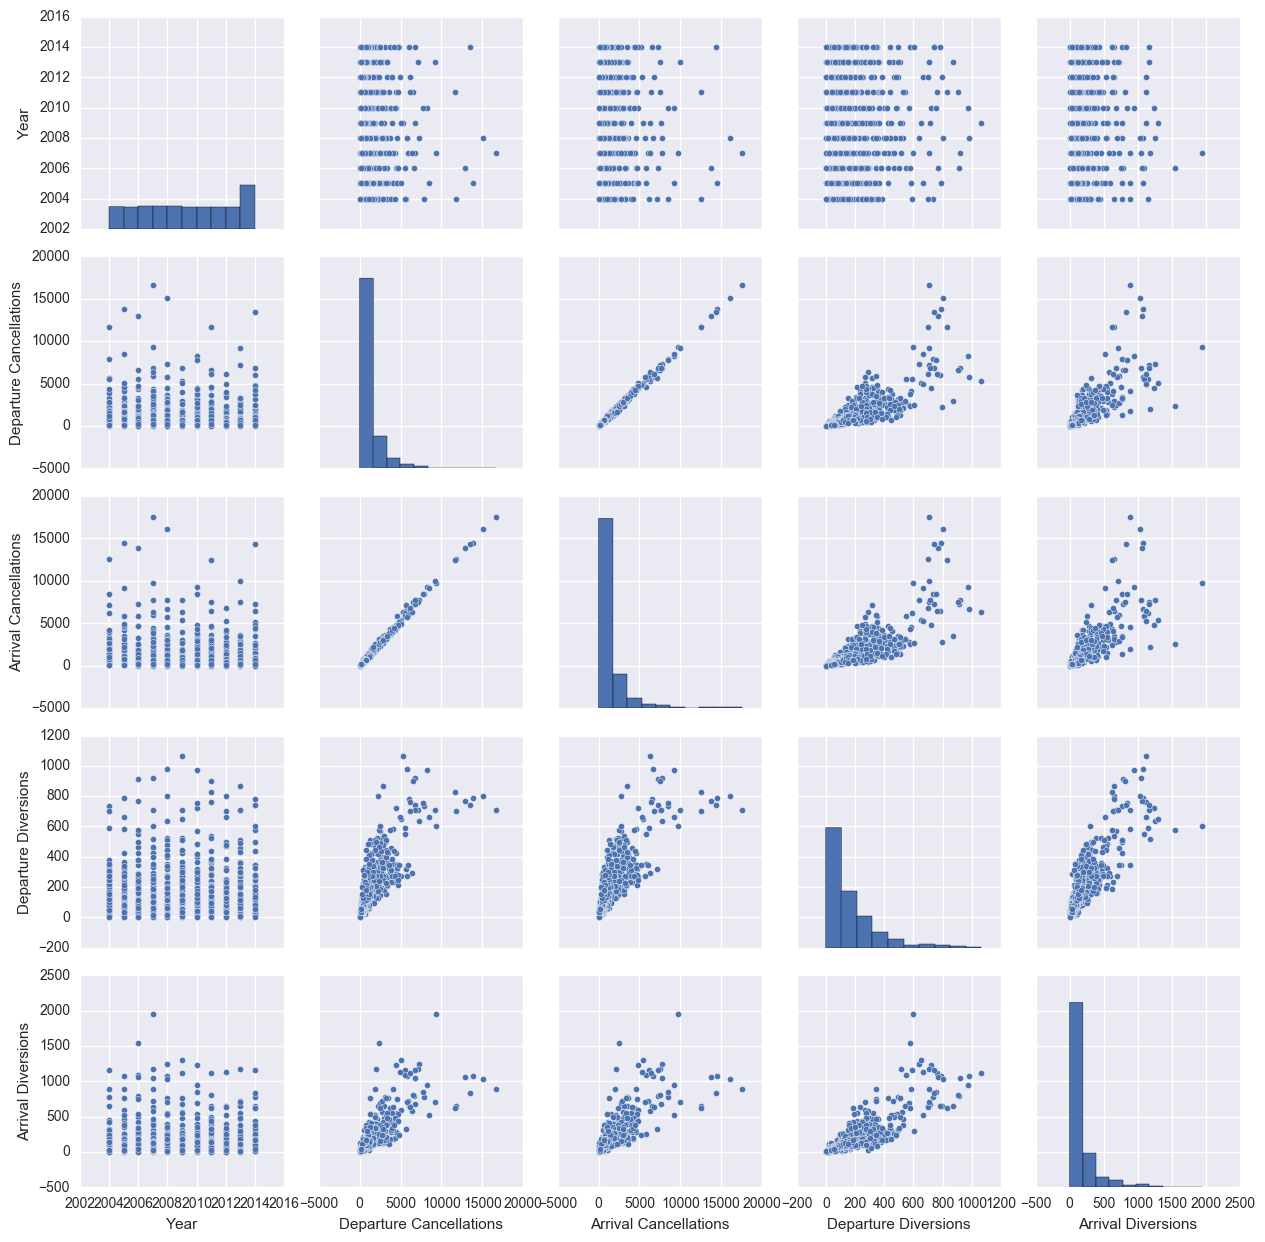

In [33]:
sns.pairplot(cancellations);

#### Are there any unique values? 

## Columns to Consider

### Airport Departure Delay
There are some columns that are derivations of a sort from the other columns. Take 'average airport departure delay' as an example. It would be composed of 'average taxi out delay' and 'average gate departure delay'. Plotted below, we see the relationship 'average departure delay has with each of these components. It would be pointless to include all three of these columns. As such, we have the option of using the average 'airport departure delay' or its components. I believe that taxi out delays and gate delays are mutually exclusive, and that using the 'average airpot departure delay' columns would hide information. So, I will not use 'average airport departure delay.

### Departure Cancellations & Arrival Cancellations
The columns 'Departure Cancellations' and 'Arrival Cancellations' are extremely correlated. In the cases of extreme weather in the real world, an airport will not allow for planes to either depart or arrive, so there must necessarily be extreme correlation. This fact means that we do not need to use both columns. One should suffice.

### Average Taxi Out Time & Average Taxi Out Delay
'Average taxi out time' and 'average taxi out delay' are both important. Taxi out time describes the density of an airport. Longer times correspond to airports with a higher density of gates. Longer delays correspond to either a lack of taxis, a larger distance needed to be covered to reach the aircraft to be taxid, or something else. Whatever the case might be, we are interested in grouping together airports of certain types, and information would be lost if we removed either of these columns

### Percent On-time Gate Departures, Percent On-time Airport Departures, & Percent On-time Gate Arrivals
These columns might seem useless, but are important to describing the frequencies of delays at an airport. We have figures as to what the delay times are, but information on how often those delays occur would be lost if we were to remove these columns.

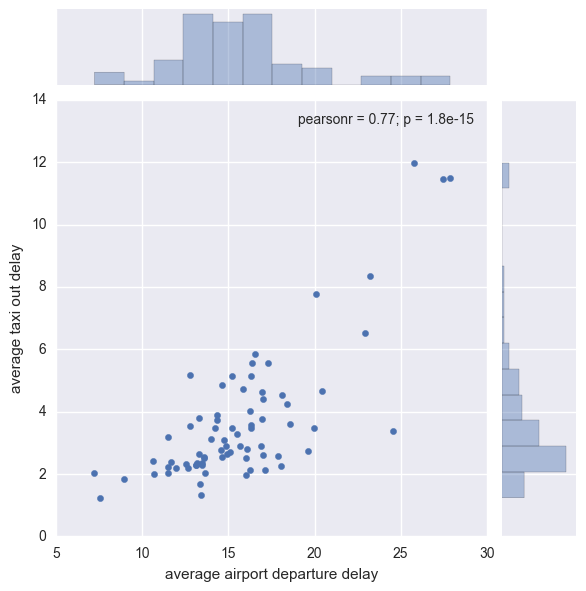

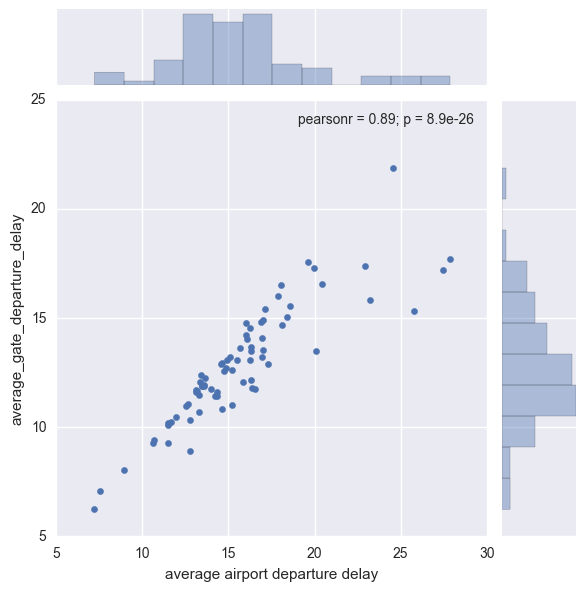

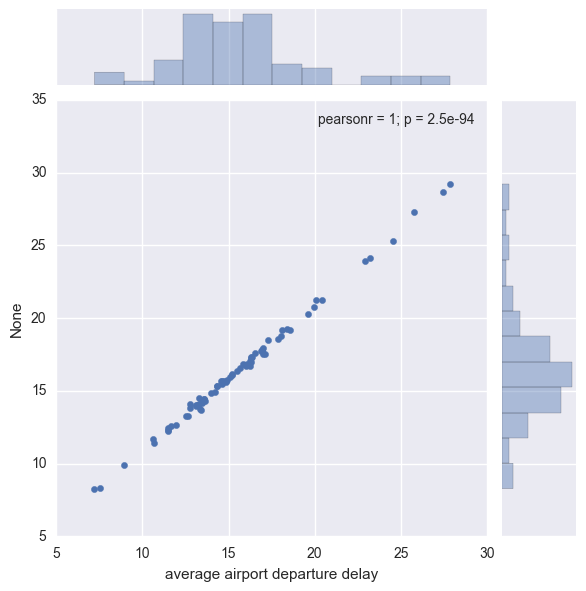

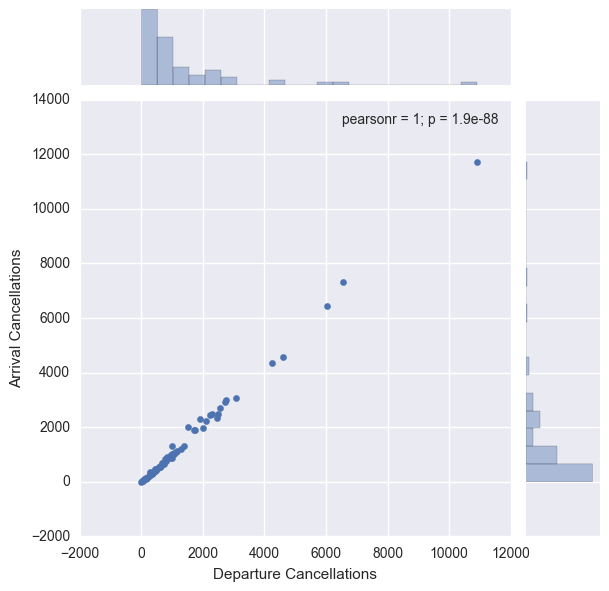

In [34]:
sns.jointplot(df['average airport departure delay'],df['average taxi out delay'])
plt.show()
sns.jointplot(df['average airport departure delay'],df['average_gate_departure_delay'])
plt.show()
sns.jointplot(df['average airport departure delay'],df['average_gate_departure_delay']+df['average taxi out delay'])
plt.show()
sns.jointplot(df['Departure Cancellations'],df['Arrival Cancellations'])
plt.show()

### Part 3: Data Mining

In [35]:
df.head(1)

,Airport,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,...,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available,Size Category
0,ABQ,44830.454545,44947.272727,0.8018,0.775791,0.786673,10.964545,10.211818,2.319091,12.534545,...,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,S


#### 3.1 Create Dummy Variables

In [36]:
# No missing values, all good!
for col in df.columns:
    if len(df[pd.isnull(df[col])])>0:
        print len(df[pd.isnull(df[col])])

In [37]:
df.dtypes

Airport                                object
departures for metric computation     float64
arrivals for metric computation       float64
percent on-time gate departures       float64
percent on-time airport departures    float64
percent on-time gate arrivals         float64
average_gate_departure_delay          float64
average_taxi_out_time                 float64
average taxi out delay                float64
average airport departure delay       float64
average airborne delay                float64
average taxi in delay                 float64
average block delay                   float64
average gate arrival delay            float64
Departure Cancellations               float64
Arrival Cancellations                 float64
Departure Diversions                  float64
Arrival Diversions                    float64
Total Flights                         float64
Key                                   float64
LocID                                  object
AP_NAME                           

No dummies necessary in this part of the assignment.

#### 3.2 Format and Clean the Data

It is appropriate to scale the data here. We wouldn't want an axis to be overly representative. 

In [40]:
cols_to_use=[u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay',
       u'Departure Cancellations', u'Arrival Cancellations',
       u'Departure Diversions', u'Arrival Diversions']

cols_to_use2=[ u'average_gate_departure_delay',
       u'average taxi out delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay',u'percent on-time airport departures', u'percent on-time gate arrivals', ]
       
# u'percent on-time gate departures',
#        u'percent on-time airport departures',u'percent on-time gate arrivals',
#        "average airport departure delay",
# u'average gate arrival delay',

In [41]:
df=pd.merge(operations,cancellations,left_on=["airport",'year'],right_on=['Airport',"Year"]).merge(\
                airports[["LocID","STATE","AP Type"]], left_on=["airport"], right_on=["LocID"],how='left')
df=df.groupby(["Airport"])[[u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay',
       u'Departure Cancellations', u'Arrival Cancellations',
       u'Departure Diversions', u'Arrival Diversions']].mean()
df=df.reset_index()
df["Total Flights"]=df["departures for metric computation"]+df["arrivals for metric computation"]
df=df.merge(airports,left_on="Airport",right_on="LocID")
X=df[cols_to_use].copy()
X0=df[cols_to_use2].copy()
X1=df[cols_to_use2].copy()
X2=df[cols_to_use2].copy()
X3=df[cols_to_use2].copy()

X0=np.array(X0)
X1=preprocessing.MinMaxScaler().fit_transform(X1)
X2=preprocessing.Normalizer().fit_transform(X2)
X3=preprocessing.RobustScaler().fit_transform(X3)

### Part 4: Define the Data

#### 4.1 Confirm that the dataset has a normal distribution. How can you tell? 

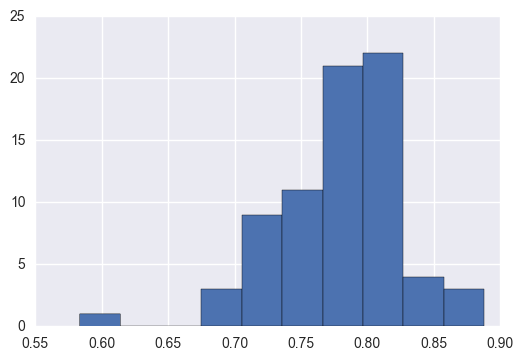

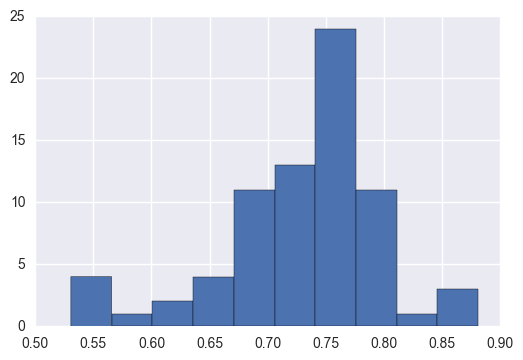

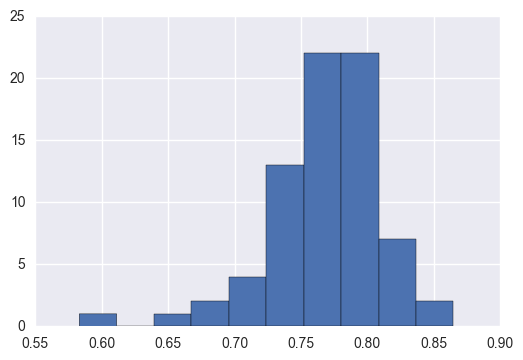

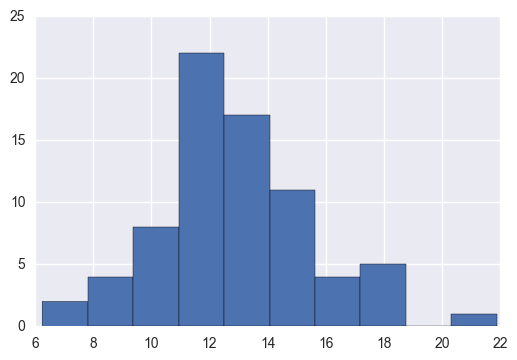

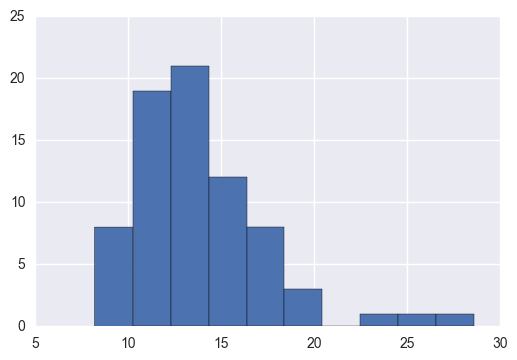

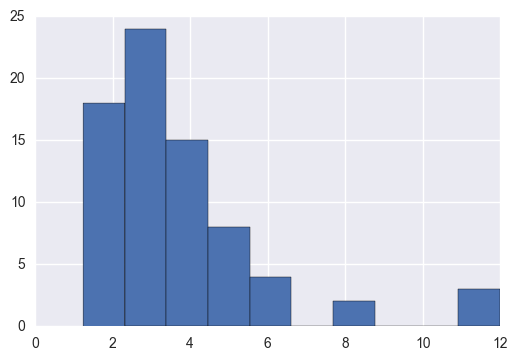

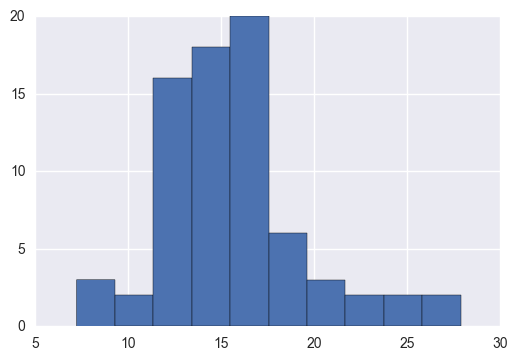

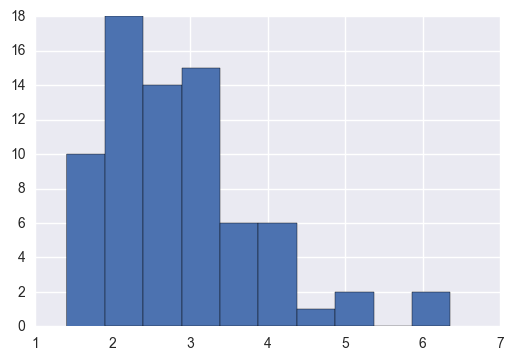

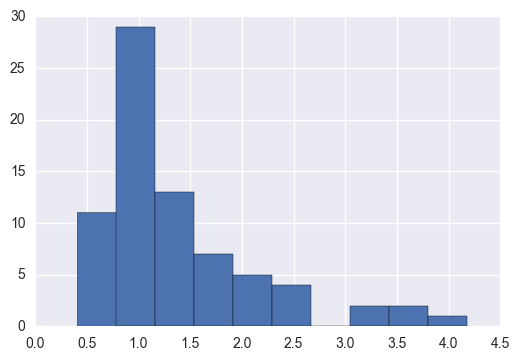

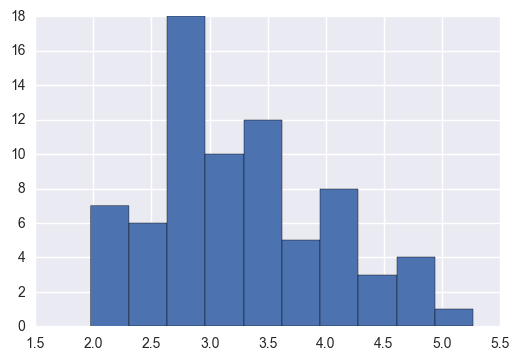

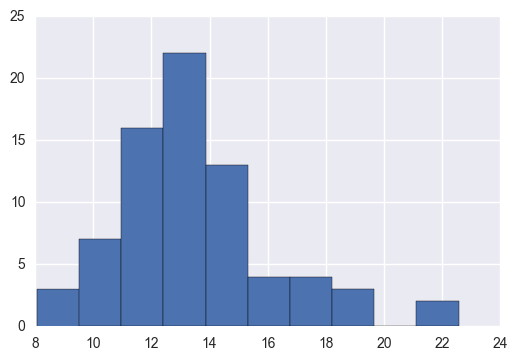

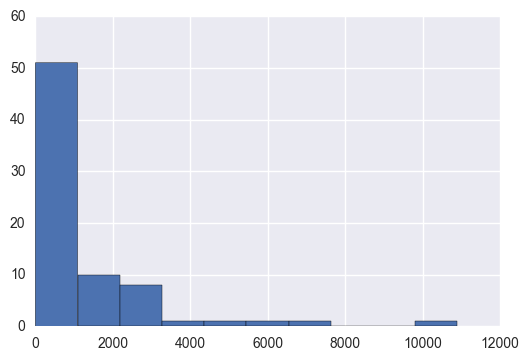

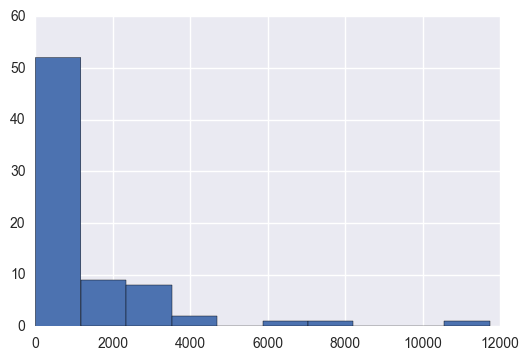

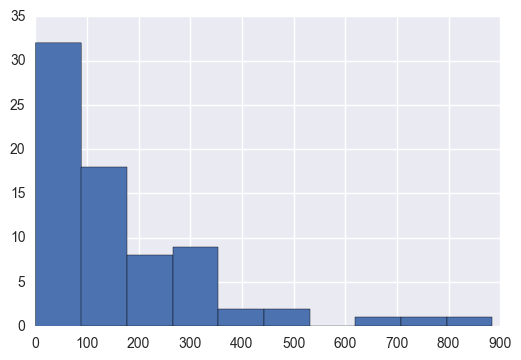

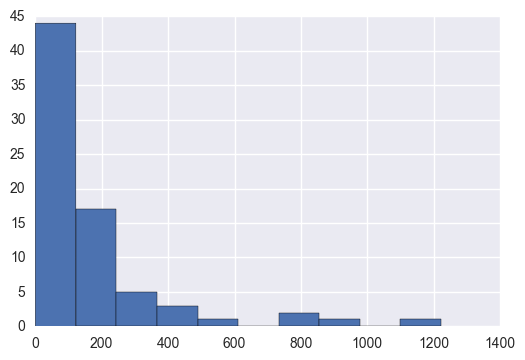

In [42]:
for col in cols_to_use:
    plt.hist(df[col])
    plt.show()

The dataset does not have a normal distribution. Then again, I wouldnt want it to. If it has a normal distribution, then we are being very nice to the airports with lots of delays, and very mean to airports with no delays by shifting the distribution to being Gaussian.

#### 4.2 Find correlations in the data

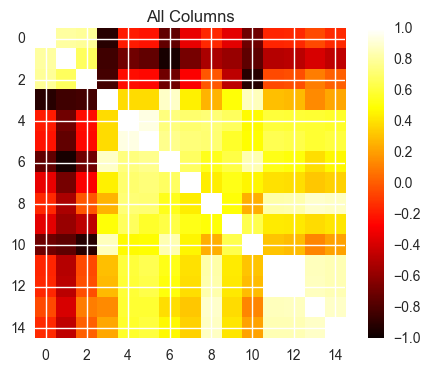

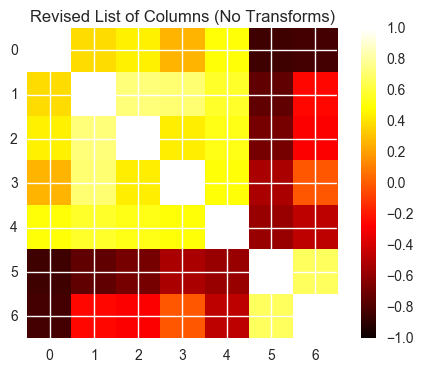

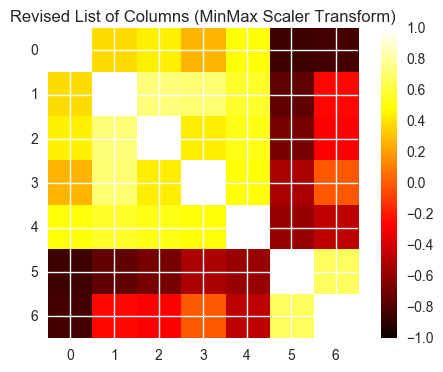

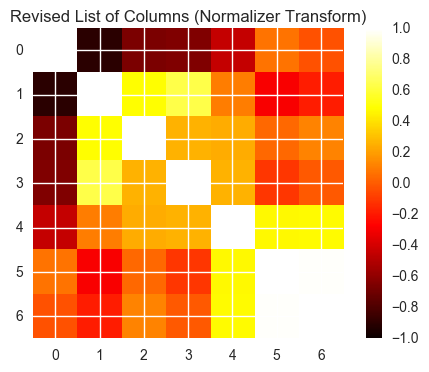

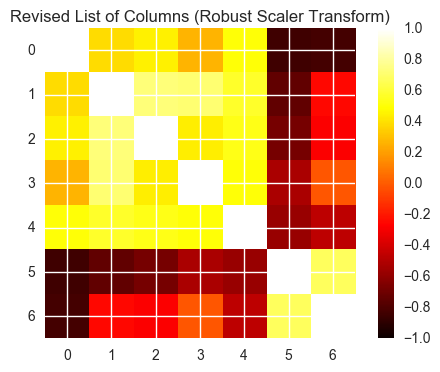

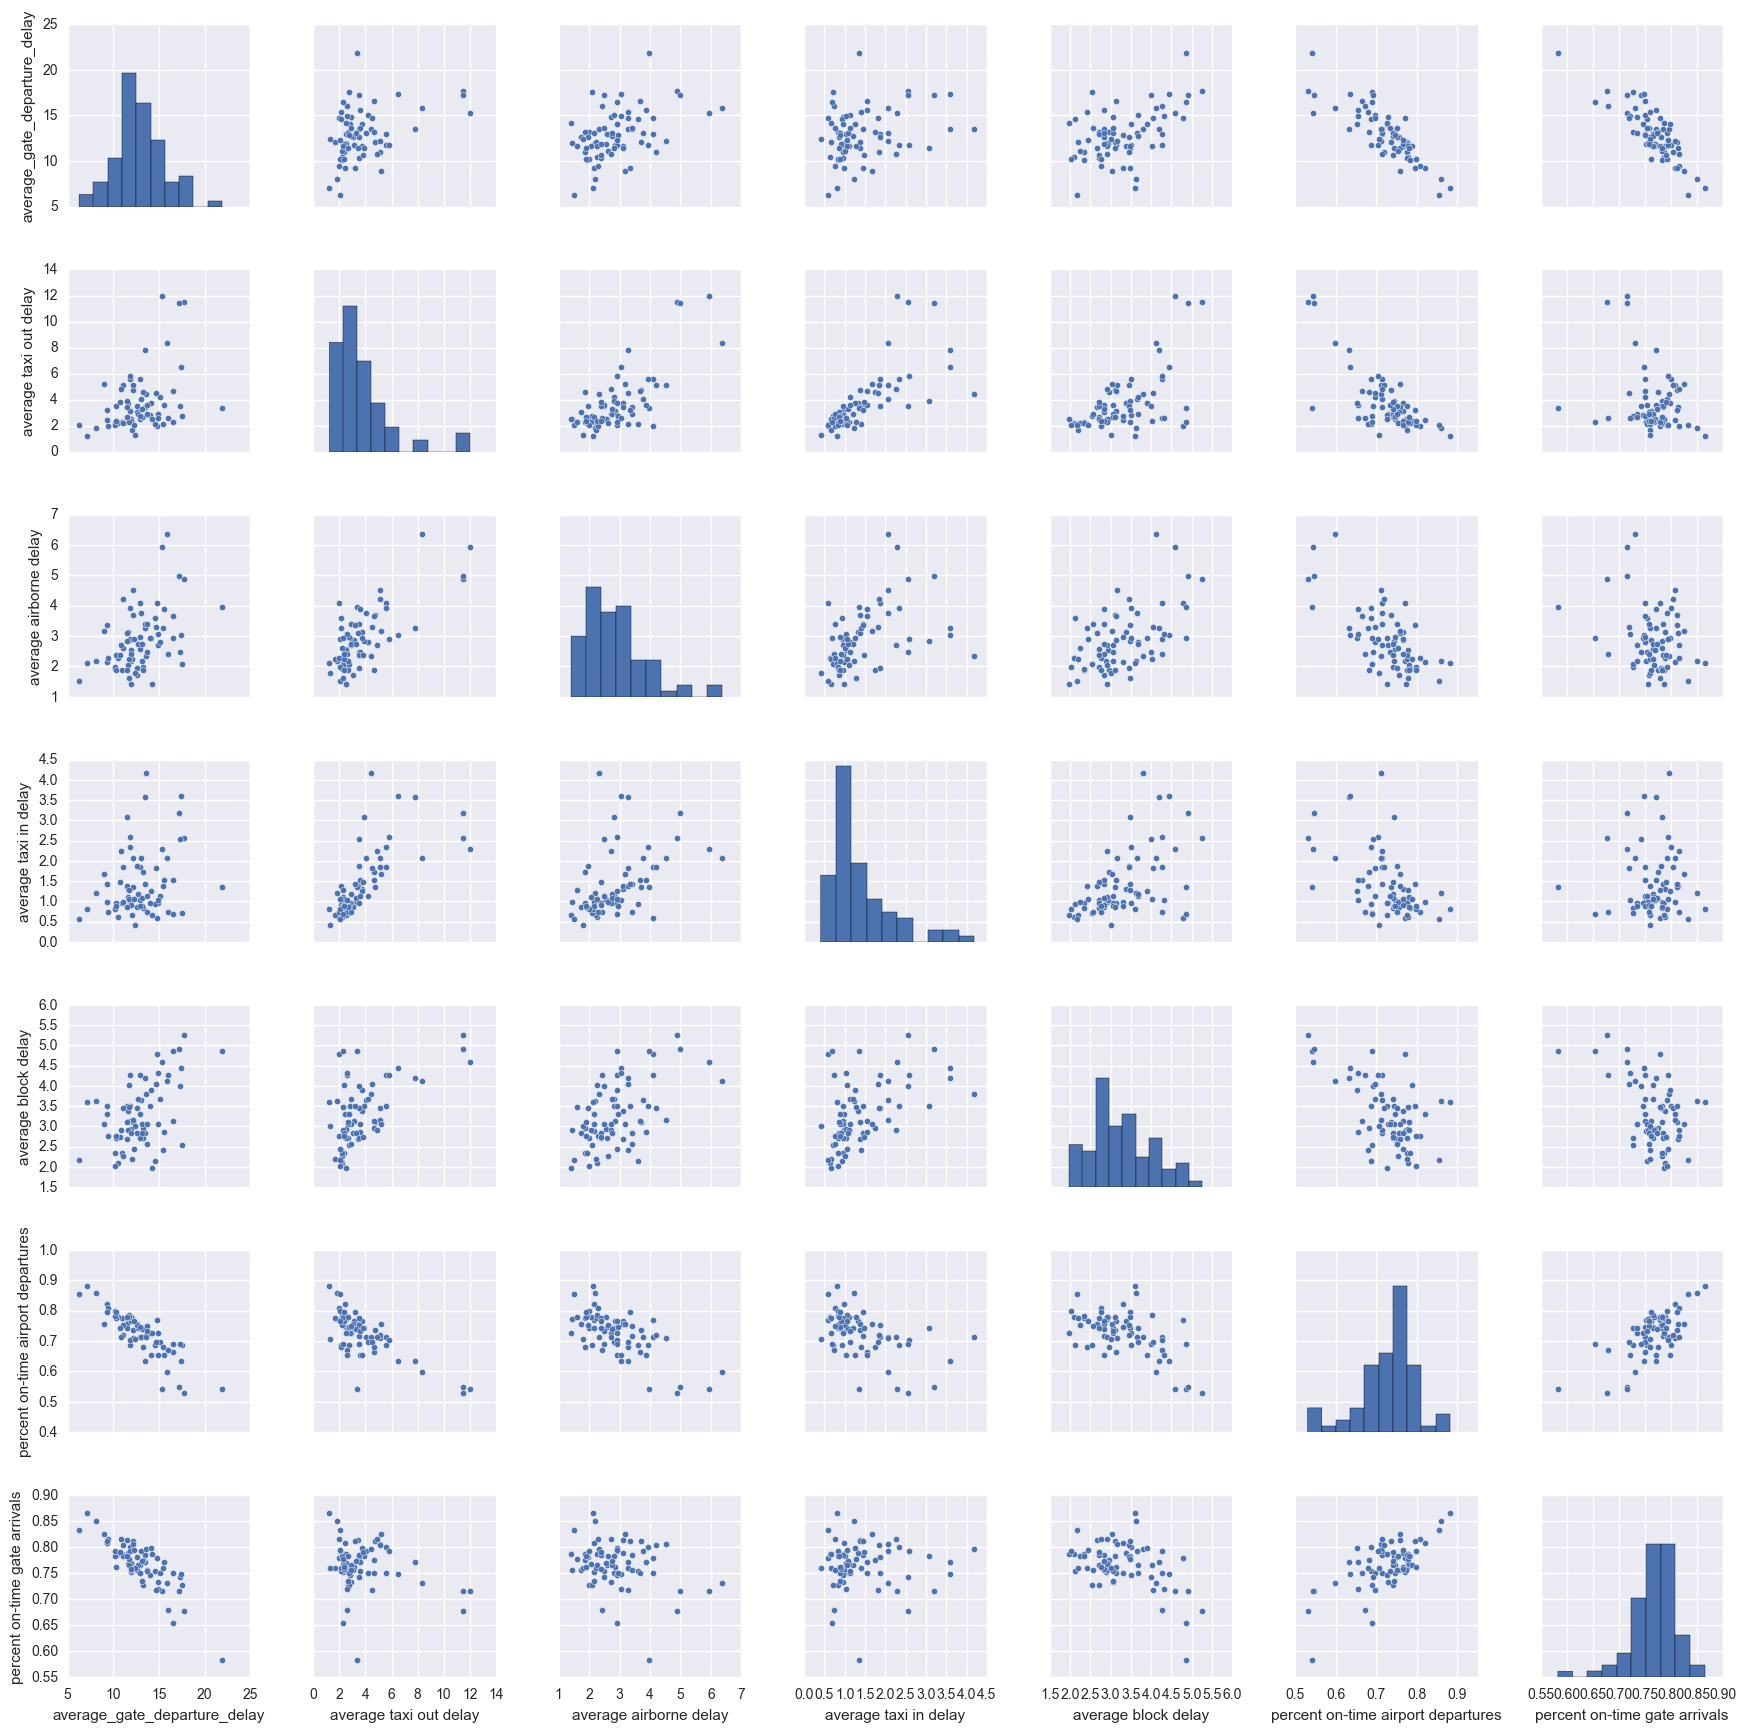

In [43]:
pca=PCA()
pca0=PCA()
pca1=PCA()
pca2=PCA()
pca3=PCA()
pca.fit(X)
pca0.fit(X0)
pca1.fit(X1)
pca2.fit(X2)
pca3.fit(X3)

plt.imshow(pd.DataFrame(X).corr(),cmap='hot',interpolation='nearest')
plt.title("All Columns")
plt.colorbar()
plt.clim(-1,1)
plt.show()
plt.imshow(pd.DataFrame(X0).corr(),cmap='hot',interpolation='nearest')
plt.title("Revised List of Columns (No Transforms)")
plt.colorbar()
plt.clim(-1,1)
plt.show()
plt.imshow(pd.DataFrame(X1).corr(),cmap='hot',interpolation='nearest')
plt.title("Revised List of Columns (MinMax Scaler Transform)")
plt.colorbar()
plt.clim(-1,1)
plt.show()
plt.imshow(pd.DataFrame(X2).corr(),cmap='hot',interpolation='nearest')
plt.title("Revised List of Columns (Normalizer Transform)")
plt.colorbar()
plt.clim(-1,1)
plt.show()
plt.imshow(pd.DataFrame(X3).corr(),cmap='hot',interpolation='nearest')
plt.title("Revised List of Columns (Robust Scaler Transform)")
plt.colorbar()
plt.clim(-1,1)
plt.show()
sns.pairplot(pd.DataFrame(X0,columns=cols_to_use2));

#### 4.3 What is the value of understanding correlations before PCA? 

There seems to be some highly correlated columns, but I am not worried about them. I believe I have removed all of the directly related columns, so there should be no multicolinearity. As for the highly correlated columns, PCA will remove the unimportant ones. As for the highly correlated columns that don't get removed, each column represents different information, so high correlation does not necessarily mean repeating information. As for the correlations of the various transformations, we expect the normalizer transform to change the correlations, as we subtract the mean from the data, so correlations can change. It is a little concerning to have such highly correlated data, but, again, I have removed all of the direct relationships.

#### 4.4 Validate your findings using statistical analysis

In [44]:
df.head()

,Airport,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,...,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,ABQ,44830.454545,44947.272727,0.801800,0.775791,0.786673,10.964545,10.211818,2.319091,12.534545,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
1,ANC,67627.545455,63188.454545,0.796600,0.770364,0.778991,14.769091,12.317273,1.977273,16.006364,...,Ted Stevens Anchorage Int'l Airport,Airport,AAL,ANCHORAGE,ANCHORAGE,AK,Federalized/Commercial,61.174083,-149.998194,Yes
2,ATL,469004.000000,465716.909091,0.771836,0.633418,0.771736,13.477273,19.768182,7.777273,20.069091,...,Hartsfield-Jackson Atlanta Int'l,Airport,ASO,FULTON,ATLANTA,GA,Federalized/Commercial,33.636700,-84.427864,Yes
3,AUS,53456.000000,53424.363636,0.793200,0.769582,0.751900,11.893636,11.561818,2.272727,13.444545,...,Austin-Bergstrom Int'l Airport,Airport,ASW,TRAVIS,AUSTIN,TX,Federalized/Commercial,30.194528,-97.669889,Yes
4,BDL,45903.090909,45482.000000,0.807273,0.765327,0.761436,11.766364,13.052727,3.106364,14.011818,...,Bradley Int'l Airport,Airport,ANE,HARTFORD,WINDSOR LOCKS,CT,Federalized/Commercial,41.939145,-72.683371,Yes


In [130]:
def KMEANS_MODELER(data,low_range,high_range):
    pred_list=[]
    num_plots1=(int(np.sqrt(high_range-low_range-1))+1)
    num_plots2=num_plots1
    plt.subplots(num_plots1,num_plots2,figsize=(12,9))
    counter=1
    for num_clusters in range(low_range,high_range):
        d1=[]
        d2=[]
        km=cluster.KMeans(n_clusters= num_clusters)
        km.fit(data)
        pred=km.predict(data)
        pred_list.append(pred)
        
        
        for fir_col in ["average_gate_departure_delay"]:
            for sec_col in ["average block delay"]:
                plt.subplot(num_plots1,num_plots2,counter)
                title=str("\n"+str(num_clusters)+" clusters")
#                 plt.text(5,15000,title)
                plt.scatter(data.loc[:,fir_col],data.loc[:,sec_col],c=pred, s=20,cmap='hot')
                plt.xlabel(fir_col)
                plt.ylabel(sec_col)
                plt.xlim(0,)
                plt.legend(['%s Clusters' %num_clusters])
            counter+=1
    plt.show()
    return pred_list

    
    
def modeler(j,data):
    d1=[]
    d2=[]
    for i in range(2,j):
        km=cluster.KMeans(n_clusters=i)
        km.fit(data)
        pred=km.predict(data)
        d1.append(silhouette_score(data,pred))
        d2.append(i)
        i+=1
    return d1,d2

Below are the pre-PCA clusters. The results are okay, but I would like them to be plotted more appropriately and removed of noise.


 
 This is method X0


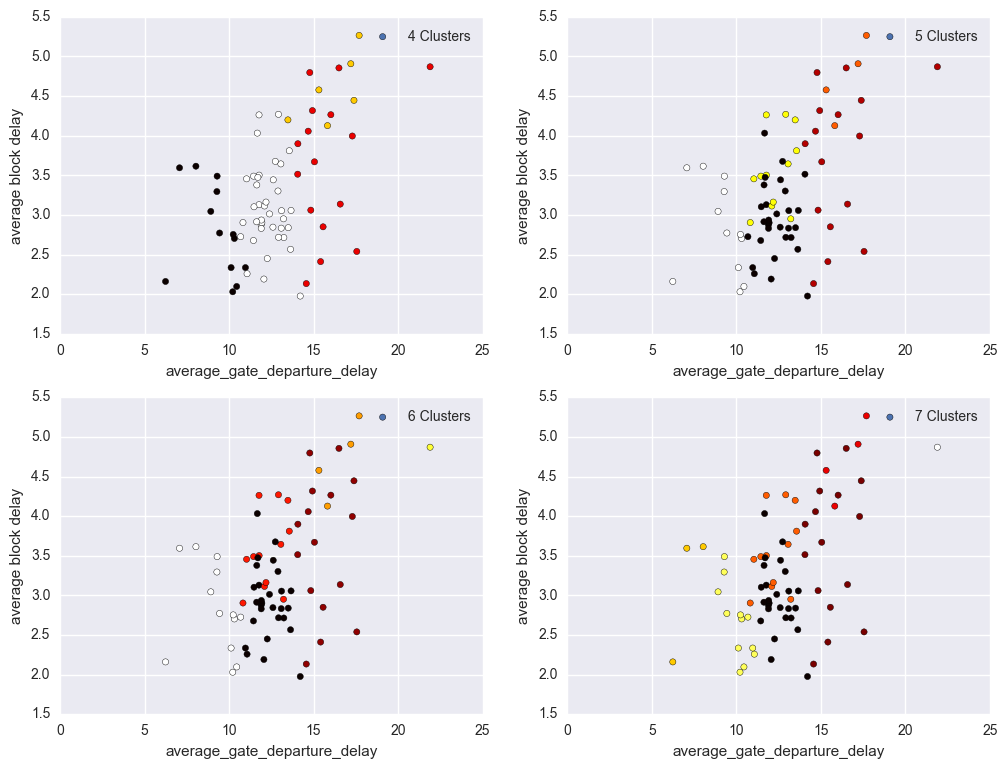


 
 This is method X1


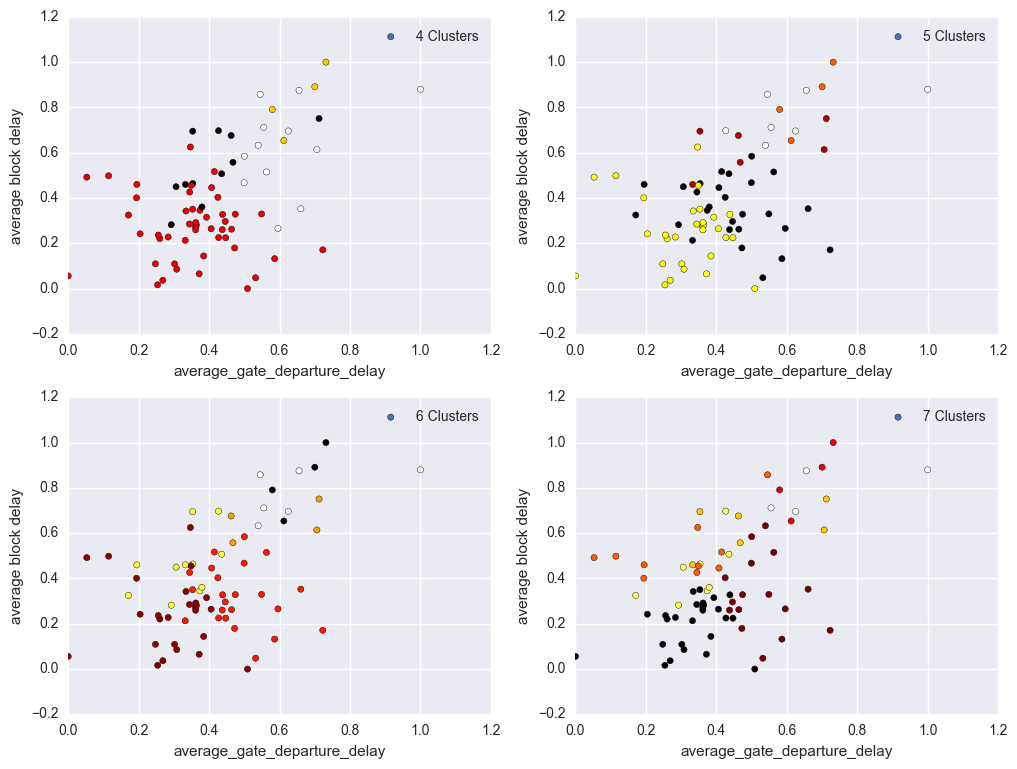


 
 This is method X2


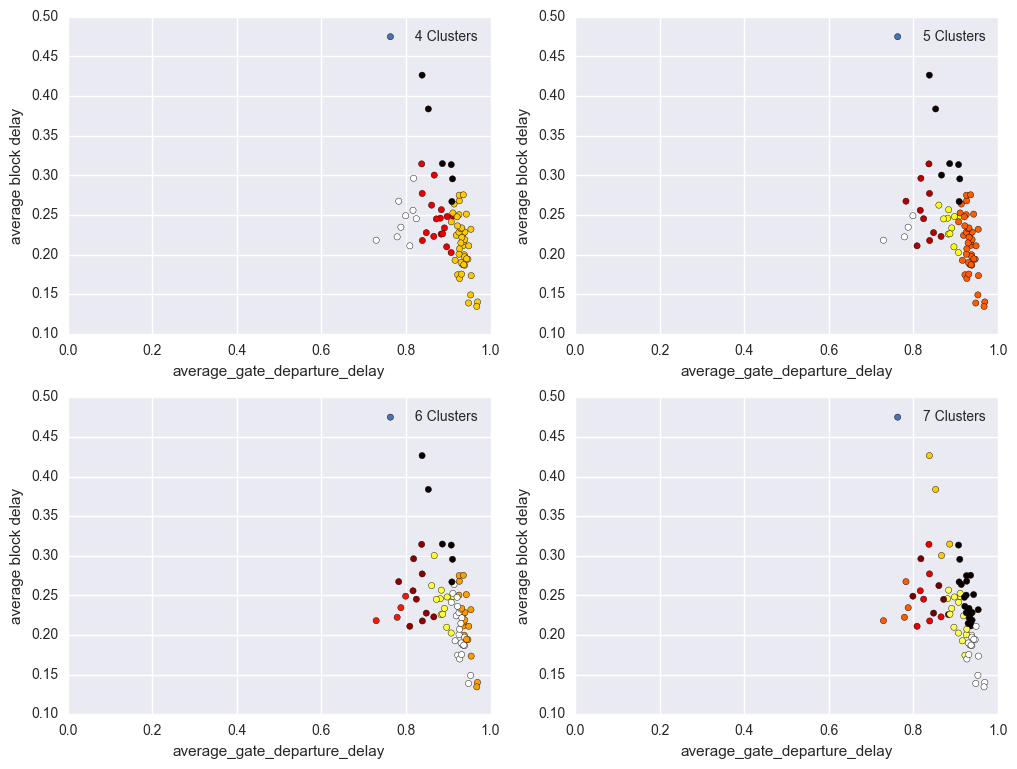


 
 This is method X3


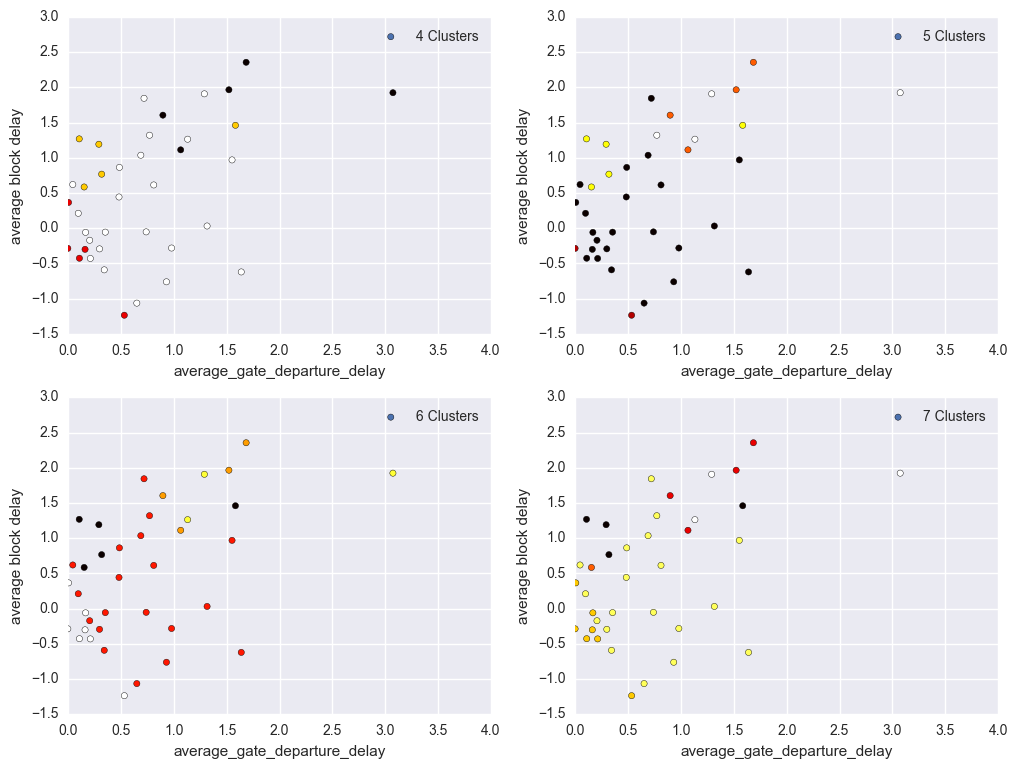

In [131]:
low_cluster=4
high_cluster=8

predictions=[]
method=0
for DATA in [X0,X1,X2,X3]:
    print "\n \n This is method X%s" %method
    predictions.append(KMEANS_MODELER(pd.DataFrame(DATA,columns=cols_to_use2),low_cluster,high_cluster))
    method+=1

Below are my silhouette scores. They are not the strongest, but I do not want to comprimise my results by adding non-relevant clustering features. So, I will make do with the scores I have, as they are not terrible.

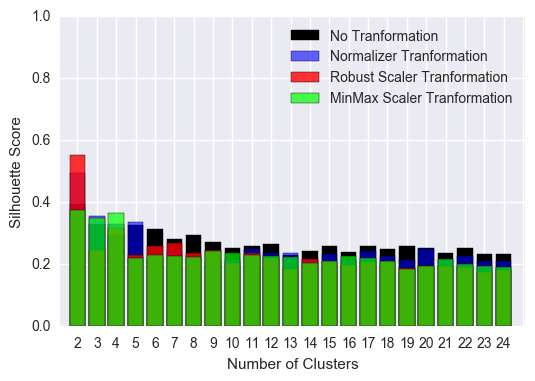

In [253]:
n=25
info1, info2=modeler(n,X0)
plt.bar(info2,info1,color=(0,0,0,1),label="No Tranformation")
info1, info2=modeler(n,X2)
plt.bar(info2,info1, color=(0,0,1,0.6),label="Normalizer Tranformation")
info1, info2=modeler(n,X3)
plt.bar(info2,info1,color=(1,0,0,.8),label="Robust Scaler Tranformation")
info1, info2=modeler(n,X1)
plt.bar(info2,info1,color=(0,1,0,.7),label="MinMax Scaler Tranformation")

plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylim(0,1)
plt.xlim(2,n)
plt.legend(loc='upper right')
plt.xticks(np.linspace(2.4,n+.4,n-1),range(2,n))
plt.xlim(1.5,n+.5)

plt.show()

In [128]:
def DBSCAN_MODELER(data, minimum, epsilon):
    dbscan=DBSCAN(min_samples=minimum,eps=epsilon)
    pred=dbscan.fit_predict(data)
    plt.subplots(2,1,figsize=(10,4))
    counter=1
    print dbscan
    for fir_col in ["average_gate_departure_delay"]:
        for sec_col in ["average block delay"]:
            plt.subplot(1,2,counter)
            plt.scatter(data.loc[:,fir_col],data.loc[:,sec_col],c=pred, s=20,cmap='hot')
            plt.xlabel(fir_col)
            plt.ylabel(sec_col)
            counter+=1
    plt.show()


I tried the DBSCAN method below. It performed poorly, so I didn't use it.

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
    min_samples=5, n_jobs=1, p=None)


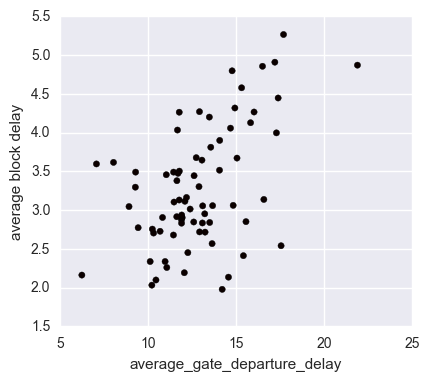

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
    min_samples=5, n_jobs=1, p=None)


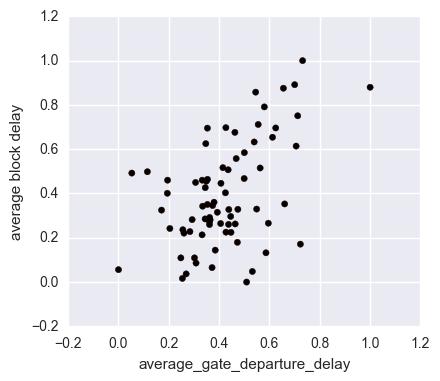

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
    min_samples=5, n_jobs=1, p=None)


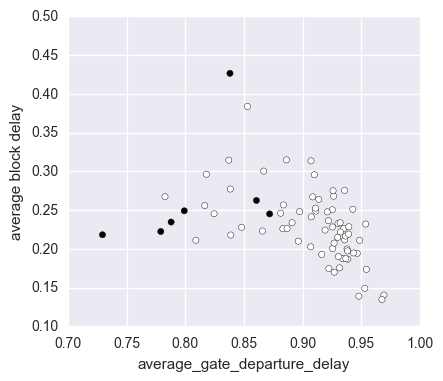

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
    min_samples=5, n_jobs=1, p=None)


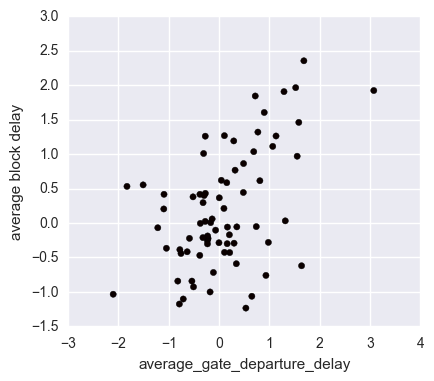

In [129]:
m=5
e=.1
for DATA in [X0,X1,X2,X3]:
    DBSCAN_MODELER(pd.DataFrame(DATA,columns=cols_to_use2),m,e)

It would appear that 2, 3, or 4 clusters are the appropriate numbers to use. 

#### 4.5 How can you improve your overall analysis? 

### Part 5: Perform a PCA

#### 5.1 Conduct the PCA

Below are two different graphs of the eigenvalues. A cumulative explained variance ratio of 90% seems appropriate.

In [132]:
components=20
pca0=PCA()
pca1=PCA()
pca2=PCA()
pca3=PCA()
X_tranform0=pca0.fit_transform(X0)
X_tranform1=pca1.fit_transform(X1)
X_tranform2=pca2.fit_transform(X2)
X_tranform3=pca3.fit_transform(X3)

heater=[np.cumsum(pca0.explained_variance_ratio_),
np.cumsum(pca1.explained_variance_ratio_),
np.cumsum(pca2.explained_variance_ratio_),
np.cumsum(pca3.explained_variance_ratio_)]

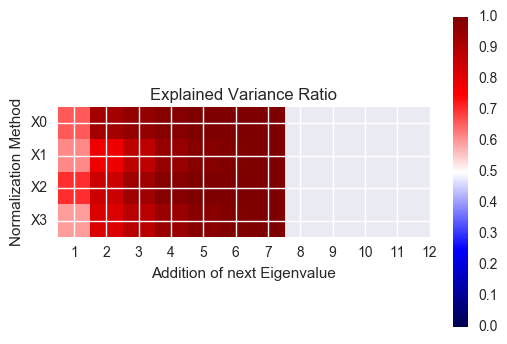

In [133]:
plt.imshow(np.array(heater).reshape(len(heater),len(heater[0])),cmap='seismic',interpolation='nearest')
plt.colorbar()
plt.title("Explained Variance Ratio")
plt.xticks(range(12),range(1,13))
plt.xlabel("Addition of next Eigenvalue")
plt.yticks(range(4),["X0","X1","X2","X3"])
plt.ylabel("Normalization Method")
plt.clim(0,1)
plt.show()

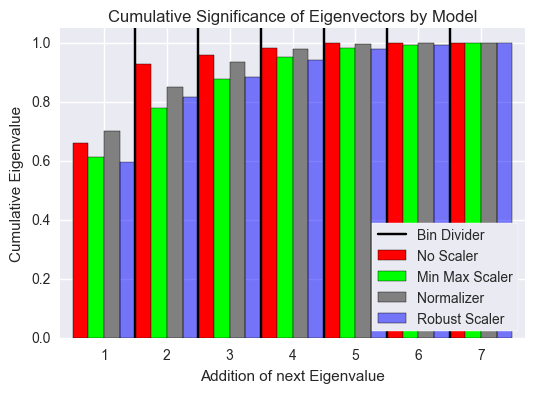

In [279]:
delta=0.25
plt.bar(np.linspace(0,len(heater[0])-1,len(heater[0])),np.array(heater).reshape(len(heater),\
                                                len(heater[0]))[0],color=(1,0,0,1),label='No Scaler',width=delta)
plt.bar(np.linspace(delta,len(heater[0])-1+delta,len(heater[0])),np.array(heater).reshape(len(heater),\
                                                len(heater[0]))[1],color=(0,1,0,1),label='Min Max Scaler',width=delta)
plt.bar(np.linspace(2*delta,len(heater[0])-1+2*delta,len(heater[0])),np.array(heater).reshape(len(heater),\
                                                len(heater[0]))[2],color=(0.5,.5,.5,1),label='Normalizer',width=delta)
plt.bar(np.linspace(3*delta,len(heater[0])-1+3*delta,len(heater[0])),np.array(heater).reshape(len(heater),\
                                                len(heater[0]))[3],color=(0,0,1,0.5),label='Robust Scaler',width=delta)
plt.vlines(range(1,7),0,1.2,label="Bin Divider")
plt.title("Cumulative Significance of Eigenvectors by Model")
plt.ylabel("Cumulative Eigenvalue")
plt.xlabel("Addition of next Eigenvalue")
plt.xticks(np.linspace(0.5,7.5,8),range(1,8))
plt.ylim(0,1.05)
plt.xlim(-.2,7.2)
plt.legend(loc='lower right',frameon=True)
plt.show()

In [54]:
def PCA_KMEANS_MODELER(data,low_range,high_range):
    pred_list=[]
    num_plots1=(int(np.sqrt(high_range-low_range-1))+1)
    plt.subplots(num_plots1,num_plots1,figsize=(10,10))
    counter=1
    for num_clusters in range(low_range,high_range):
        km=cluster.KMeans(n_clusters= num_clusters)
        km.fit(data)
        pred=km.predict(data)
        pred_list.append(pred)
        
        plt.subplot(num_plots1,num_plots1,counter)
        title=str("\n"+str(num_clusters)+" clusters")
#                 plt.text(5,15000,title)
        plt.scatter(data.loc[:,0],data.loc[:,1],c=pred, s=20, cmap='hot')
        plt.xlabel("First EigenVector")
        plt.ylabel("Second EigenVector")
        plt.xlim(0,)
        plt.legend(['%s Clusters' %num_clusters])
        counter+=1
    plt.show()
    return pred_list

Here we select 4 eigenvectors for each of the PCAs. This seems to fit the self-set eigenvalue requirement of 90%.


 
 This is method X0


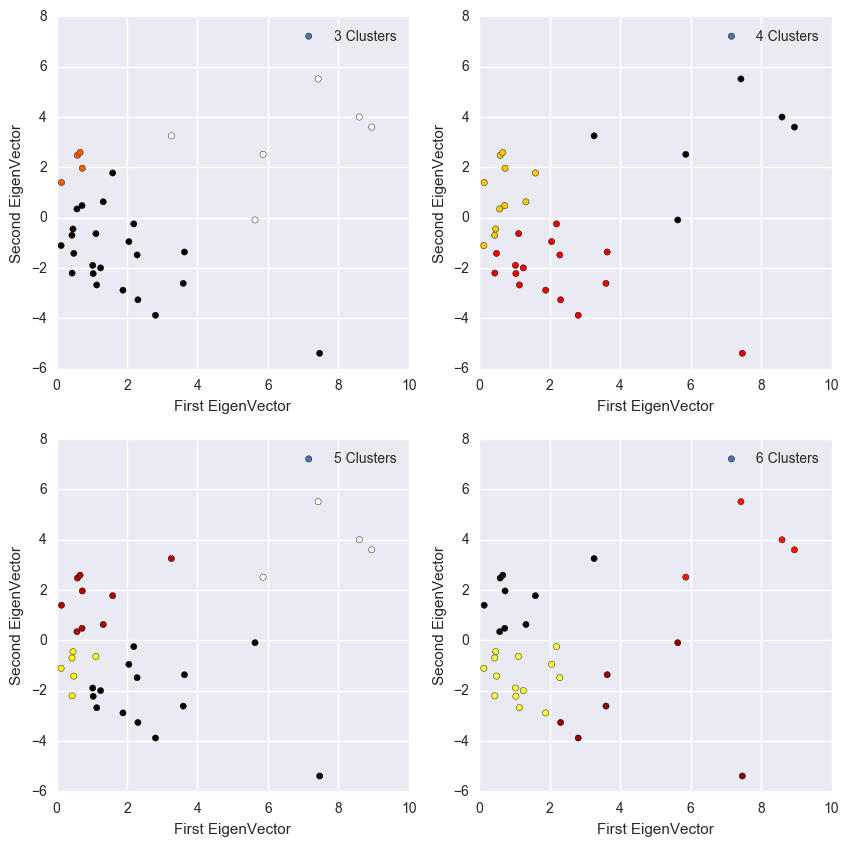


 
 This is method X1


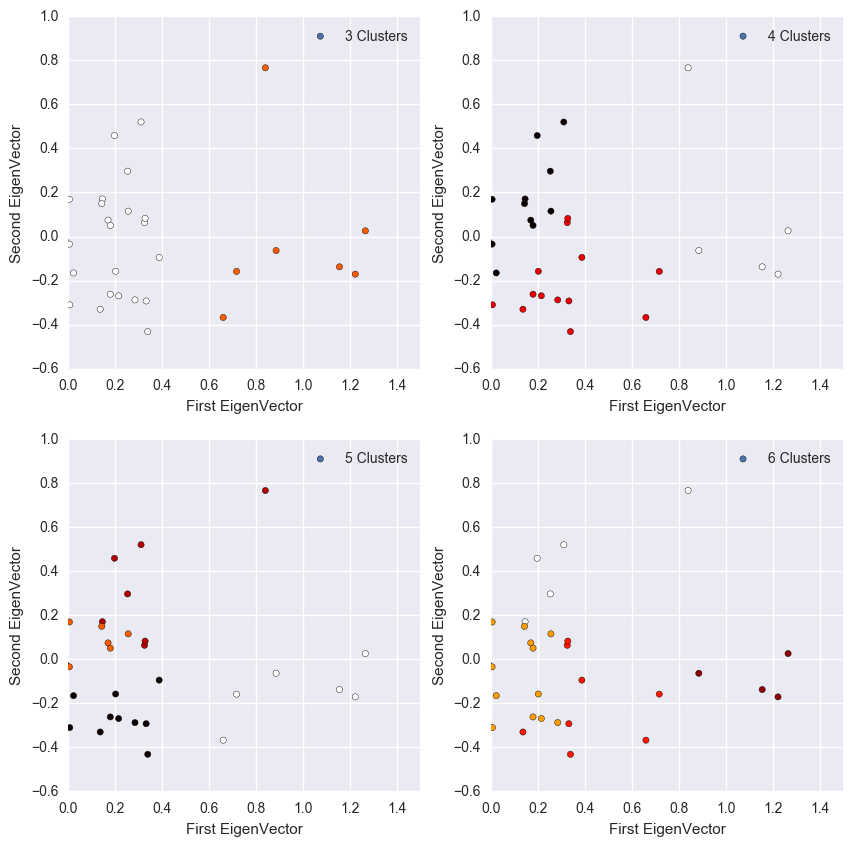


 
 This is method X2


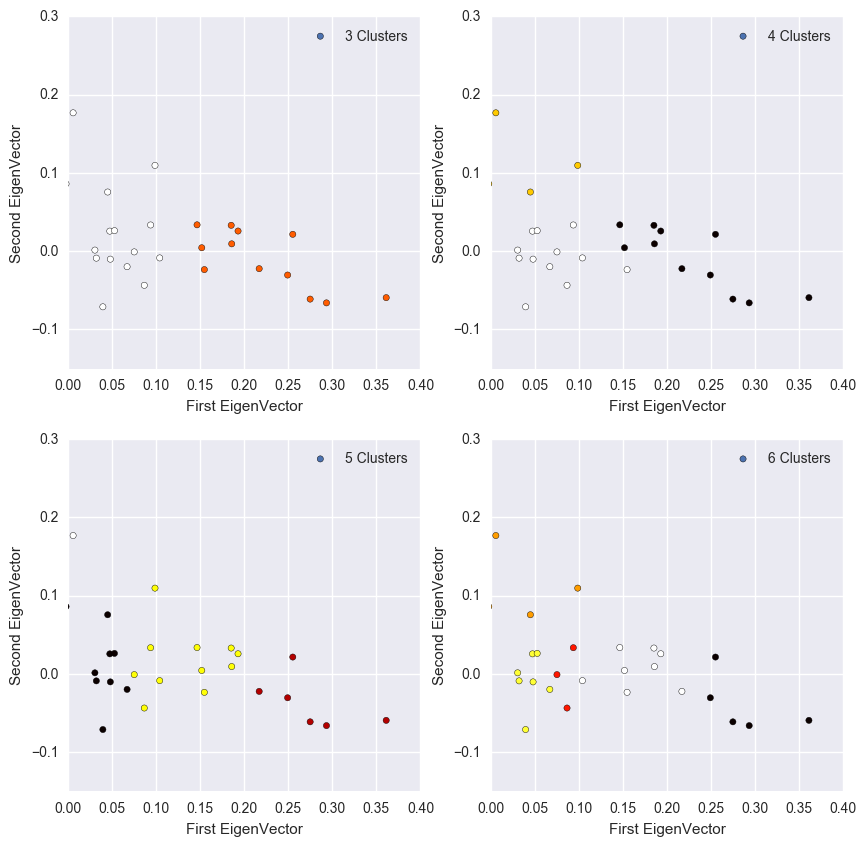


 
 This is method X3


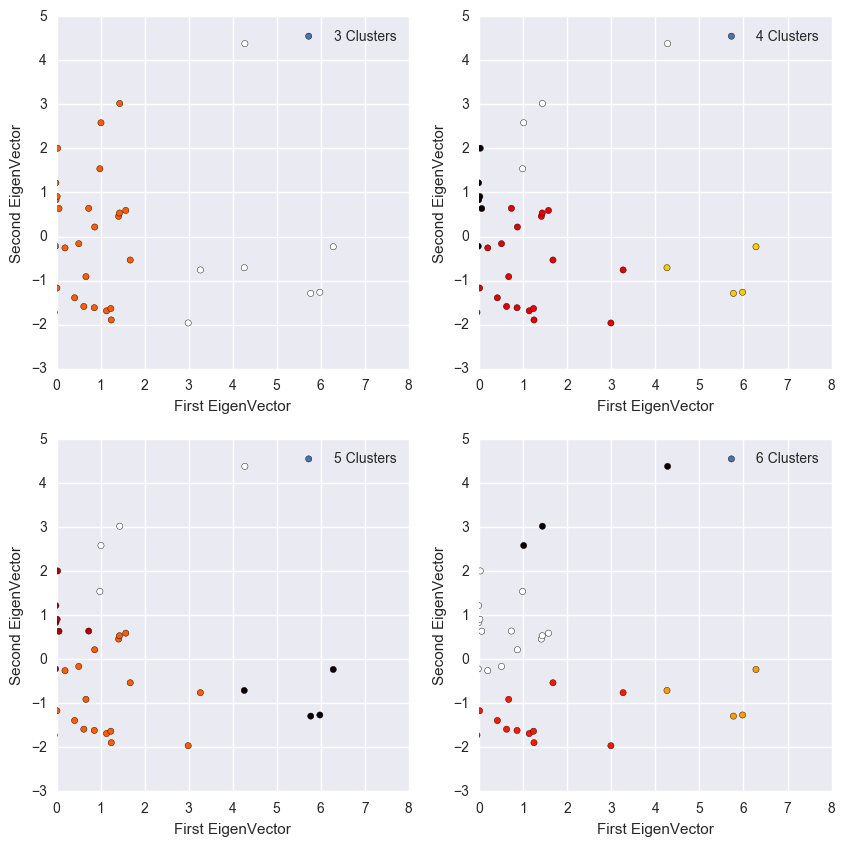

In [135]:
### PCA and K Means
components=4
pca0=PCA(n_components=components)
pca1=PCA(n_components=components)
pca2=PCA(n_components=components)
pca3=PCA(n_components=components)
X_tranform0=pca0.fit_transform(X0)
X_tranform1=pca1.fit_transform(X1)
X_tranform2=pca2.fit_transform(X2)
X_tranform3=pca3.fit_transform(X3)
# tsne0 = manifold.TSNE(n_components=components, init='pca', random_state=0,n_iter=5000)
# tsne1 = manifold.TSNE(n_components=components, init='pca', random_state=0,n_iter=5000)
# tsne2 = manifold.TSNE(n_components=components, init='pca', random_state=0,n_iter=5000)
# tsne3 = manifold.TSNE(n_components=components, init='pca', random_state=0,n_iter=5000)
# X_tsne0 = tsne0.fit_transform(X0)
# X_tsne1 = tsne1.fit_transform(X1)
# X_tsne2 = tsne2.fit_transform(X2)
# X_tsne3 = tsne3.fit_transform(X3)

low_cluster=3
high_cluster=7

PCA_predictions=[]
method=0
for DATA in [X_tranform0,X_tranform1,X_tranform2,X_tranform3]:#[X_tsne0,X_tsne1,X_tsne2,X_tsne3]:
    print "\n \n This is method X%s" %method
    PCA_predictions.append(PCA_KMEANS_MODELER(pd.DataFrame(DATA),low_cluster,high_cluster))
    method+=1

Below, I transfer the cluster labels into dataframes for classification and identification purposes.

In [136]:
df_3clusters=pd.DataFrame(pd.DataFrame(PCA_predictions,columns=["3 Clusters","4 Clusters","5 Clusters","6 Clusters"])\
                         ["3 Clusters"])
df_4clusters=pd.DataFrame(pd.DataFrame(PCA_predictions,columns=["3 Clusters","4 Clusters","5 Clusters","6 Clusters"])\
                         ["4 Clusters"])
df_5clusters=pd.DataFrame(pd.DataFrame(PCA_predictions,columns=["3 Clusters","4 Clusters","5 Clusters","6 Clusters"])\
                         ["5 Clusters"])
df_6clusters=pd.DataFrame(pd.DataFrame(PCA_predictions,columns=["3 Clusters","4 Clusters","5 Clusters","6 Clusters"])\
                         ["6 Clusters"])
df_3clusters=pd.DataFrame([x for x in df_3clusters["3 Clusters"]],index=["X0","X1","X2","X3"]).T
df_4clusters=pd.DataFrame([x for x in df_4clusters["4 Clusters"]],index=["X0","X1","X2","X3"]).T
df_5clusters=pd.DataFrame([x for x in df_5clusters["5 Clusters"]],index=["X0","X1","X2","X3"]).T
df_6clusters=pd.DataFrame([x for x in df_6clusters["6 Clusters"]],index=["X0","X1","X2","X3"]).T

### Part 6: Additional Analysis
Include any other models you'd like to run here. These can include regressions, classifications, or clusters. 

In [303]:
def rfc_predictor(X_data,y_data,model_number,name):
    print "This is %s " %name +"X%x"%model_number
    scores=[]
    for i in range(25):
        x_train,x_test,y_train,y_test=train_test_split(X_data,y_data,stratify=y_data,test_size=0.3)
        model=RandomForestClassifier()
#         params={'n_estimators':range(12,18)}
#         gs=GridSearchCV(model,params)
#         gs.fit(x_train,y_train)
        model=RandomForestClassifier()#n_estimators=gs.best_params_['n_estimators'])
        rfc=RandomForestClassifier()#n_estimators=gs.best_params_['n_estimators'])
        rfc.fit(x_train,y_train)
        pred=rfc.predict(x_test)
        scores.append(np.mean(cross_val_score(model,x_train,y_train)))
    print pd.DataFrame([dummy_df.columns,[zeta for zeta in rfc.feature_importances_]]).\
                T.sort_values(1,ascending=False).head(9)
    print "    " + str(np.mean(scores))
    print confusion_matrix(y_test,pred)
    print
    
def gb_predictor(X_data,y_data,model_number,name):
    print "This is %s " %name +"X%x"%model_number
    scores=[]
    for i in range(25):
        x_train,x_test,y_train,y_test=train_test_split(X_data,y_data,stratify=y_data,test_size=0.3)
        model=GradientBoostingClassifier()
        rfc=GradientBoostingClassifier()
        rfc.fit(x_train,y_train)
        pred=rfc.predict(x_test)
#         info_printer(model,x_train,y_train,y_test,pred,model_number,name)
        scores.append(np.mean(cross_val_score(model,x_train,y_train)))
    print pd.DataFrame([dummy_df.columns,[zeta for zeta in rfc.feature_importances_]]).\
            T.sort_values(1,ascending=False).head(9)
    print "    " + str(np.mean(scores))
    print confusion_matrix(y_test,pred)
    print
    
def et_predictor(X_data,y_data,model_number,name):
    print "This is %s " %name +"X%x"%model_number
    scores=[]
    for i in range(25):
        x_train,x_test,y_train,y_test=train_test_split(X_data,y_data,stratify=y_data,test_size=0.3)
        model=ExtraTreesClassifier()
        rfc=ExtraTreesClassifier()
        rfc.fit(x_train,y_train)
        pred=rfc.predict(x_test)
#         info_printer(model,x_train,y_train,y_test,pred,model_number,name)
        scores.append(np.mean(cross_val_score(model,x_train,y_train)))
    print pd.DataFrame([dummy_df.columns,[zeta for zeta in rfc.feature_importances_]]).\
                T.sort_values(1,ascending=False).head(9)
    print "    " + str(np.mean(scores))
    print confusion_matrix(y_test,pred)
    print

Below, I test each of the generated clusters with each standardization and 3 classification models. The purpose is to uncover which methodology is best.

The clusters formed are anonymous in nature, so one must be careful in choosing the correct methodology. The purpose of this should be to identify the method that correctly uses airport characteristics to predict an airport's cluster. The classification features chose were:

* Total Flights
* Departure Cancellations
* Departure Diversions
* STATE

1) I chose Total Flights because I saw it as a proxy for airport size. Large airports will definitely have more total flights than small airports.

2) I chose Departure Cancellations and Departure Diversions as a proxy for bad weather. The worse the weather is consistently, the more likely flights are to get delayed. 

3) I chose STATE as a proxy for funding and operational potential. For example, airports in New York would be expected to perform more poorly than airports in Washington. 

Again, these criteria are not meant to define a cluster, but are meant to demonstrate the relation of airport characteristics with the predicted clusters. Methods with higher averaged accuracy scores should be considered for use, as they indicate a tangible generalization of airport performance.

In [304]:
dfcopy=df.copy()
dummy_df=pd.merge(df[["Total Flights","Departure Cancellations",u'Departure Diversions']],\
                  pd.get_dummies(dfcopy[["STATE"]]),\
                  left_index=True,right_index=True)#,"FAA REGION"
                        #,

X=dummy_df
model_starting_num=1
model_num=model_starting_num
l1=["X1"]
print "3 Clusters \n"
for col in l1:
    if col in df_3clusters:
        y=df_3clusters[col].copy()
        rfc_predictor(X,y,model_num,"RFC")
        gb_predictor(X,y,model_num,"GB")
        et_predictor(X,y,model_num,"ET")
        model_num+=1
        print

# model_num=model_starting_num
# print "\n\n4 clusters\n"
# for col in l1:
#     if col in df_4clusters:
#         y=df_4clusters[col].copy()
#         rfc_predictor(X,y,model_num,"RFC")
#         gb_predictor(X,y,model_num,"GB")
#         et_predictor(X,y,model_num,"ET")
#         model_num+=1
#         print
    
# model_num=model_starting_num
# print "\n\n5 clusters\n"
# for col in l1:
#     if col in df_5clusters:
#         y=df_5clusters[col].copy()
#         rfc_predictor(X,y,model_num,"RFC")
#         gb_predictor(X,y,model_num,"GB")
#         et_predictor(X,y,model_num,"ET")
#         model_num+=1
#         print
    
# model_num=model_starting_num
# print "\n\n6 clusters\n"
# for col in l1:
#     if col in df_6clusters:
#         y=df_6clusters[col].copy()
#         rfc_predictor(X,y,model_num,"RFC")
#         gb_predictor(X,y,model_num,"GB")
#         et_predictor(X,y,model_num,"ET")
#         model_num+=1
#         print


3 Clusters 

This is RFC X1
                          0          1
0             Total Flights   0.260232
1   Departure Cancellations   0.259238
2      Departure Diversions   0.237286
28                 STATE_NY  0.0547199
31                 STATE_PA  0.0274204
38                 STATE_WI  0.0202563
11                 STATE_GA  0.0201122
25                 STATE_NJ  0.0174543
10                 STATE_FL   0.016097
    0.724733115468
[[13  0  0]
 [ 0  2  0]
 [ 2  0  6]]

This is GB X1
                          0          1
1   Departure Cancellations   0.267391
0             Total Flights   0.169947
2      Departure Diversions   0.138633
14                 STATE_IN  0.0950734
38                 STATE_WI  0.0878266
3                  STATE_AK  0.0866578
37                 STATE_WA  0.0586701
15                 STATE_KY  0.0569697
28                 STATE_NY  0.0288318
    0.681998910675
[[10  0  3]
 [ 1  0  1]
 [ 4  1  3]]

This is ET X1
                          0          1
1   Departu

I believe using the X1 scaler with 3 clusters is the strongest option. For one, each category has a decent number of data points, so there is no fear of neglecting a bin. Secondly, the averaged accuracy score is strong, which indicates predictive power based upon our classification features:

* Total Flights
* Departure Cancellations
* Departure Diversions
* STATE

Thus, because of the relation between the anonymous clusters and the airport features (classification features), there is a strong basis for true meaning in our manufactured clusters.

Based upon the eigenvector plots, the silhouette scores, and the accuracies, I think RFC X3 is the strongest.

Let's see the commonalities.

{'n_estimators': 17, 'max_depth': 8}
[[18  0  2]
 [ 0  1  2]
 [ 5  0  9]]
                    Feature  Importance
0             Total Flights    0.264310
2      Departure Diversions    0.240770
1   Departure Cancellations    0.232677
28                 STATE_NY    0.041929
6                  STATE_CA    0.030772
10                 STATE_FL    0.025091
9                  STATE_DC    0.022938
15                 STATE_KY    0.021834
0.756756756757
             precision    recall  f1-score   support

          0       0.78      0.90      0.84        20
          1       1.00      0.33      0.50         3
          2       0.69      0.64      0.67        14

avg / total       0.77      0.76      0.75        37

14 Number of items in bin


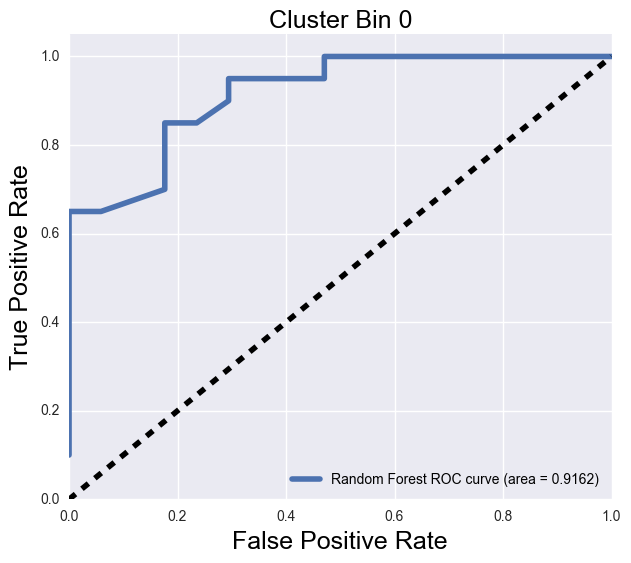

3 Number of items in bin


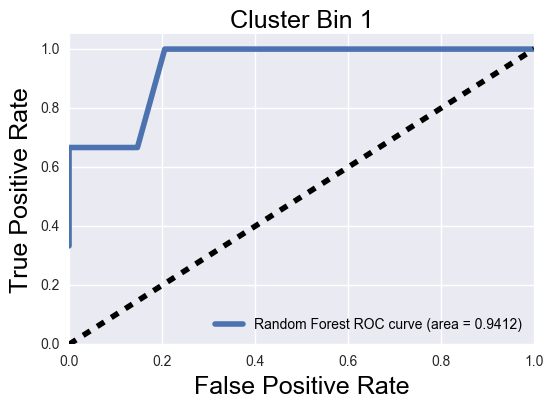

e Number of items in bin


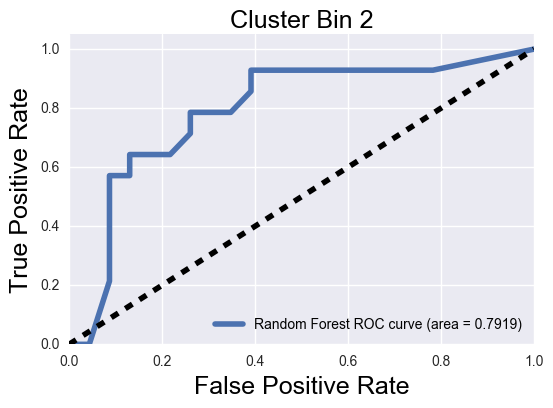

In [299]:
dfcopy=df.copy()
dummy_df=pd.merge(df[["Total Flights","Departure Cancellations",u'Departure Diversions']],\
                  pd.get_dummies(dfcopy[["STATE"]]),\
                  left_index=True,right_index=True)#,"FAA REGION"
X=dummy_df
airports_copy=airports.copy()
cluster_number=3
y=df_3clusters["X1"].copy()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5,stratify=y)

model=RandomForestClassifier()
params={'n_estimators':range(12,18),"max_depth":range(5,13),}
gs=GridSearchCV(model,params)
gs.fit(x_train,y_train)
rfc=RandomForestClassifier(n_estimators=gs.best_params_['n_estimators'],max_depth=gs.best_params_['max_depth'])
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print gs.best_params_
print confusion_matrix(y_test,pred)
print pd.DataFrame([[a,b] for a,b in zip(X.columns,rfc.feature_importances_)],columns=["Feature","Importance"]).\
                    sort_values("Importance",ascending=False).head(8)
print accuracy_score(y_test,pred)
print classification_report(y_test,pred)
probs=[rfc.predict_proba(x_test),"Random Forest"]


# et=ExtraTreesClassifier()
# et.fit(x_train,y_train)
# pred=et.predict(x_test)
# print confusion_matrix(y_test,pred)
# print pd.DataFrame([[a,b] for a,b in zip(X.columns,et.feature_importances_)],columns=["Feature","Importance"]).\
#                     sort_values("Importance",ascending=False).head(8)
# print accuracy_score(y_test,pred)
# print classification_report(y_test,pred)
# probs=[et.predict_proba(x_test),"Extra Trees"]

airports_copy=df.copy()
airports_copy2=df.copy()
airports_copy["Cluster Results"]=pd.DataFrame([num for num in y],columns=["Cluster Results"])
                                        #[num for num in df_3clusters["X0"]]
airports_copy=airports_copy[pd.notnull(airports_copy["Cluster Results"])]
airports_copy["Departure Diversions/Cancellations"]=airports_copy["Departure Diversions"]/\
            airports_copy["Departure Cancellations"]
airports_copy["Departure Cancellations/Total Flights"]=airports_copy["Departure Cancellations"]/\
            airports_copy["Total Flights"]


plt.figure(figsize=[7,6])
labels=["Cluster"]
for j in range(cluster_number):
    print "%x Number of items in bin"%sum([1 if delta==j else 0 for delta in y_test])
    FPR, TPR, _ = roc_curve(y_test, [i[j] for i in probs[0]],pos_label=j)
    ROC_AUC = auc(FPR, TPR)
    plt.plot(FPR, TPR, label=probs[1]+' ROC curve (area = %0.4f)' % ROC_AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.title(["Cluster Bin %x" %j][0], fontsize=18, color='black')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18, color='black')
    plt.ylabel('True Positive Rate', fontsize=18, color='black')
    l=plt.legend(loc="lower right")
    for text in l.get_texts():
        text.set_color("black")
    plt.show()

In [317]:
airports_copy.columns

Index([                              u'Airport',
           u'departures for metric computation',
             u'arrivals for metric computation',
             u'percent on-time gate departures',
          u'percent on-time airport departures',
               u'percent on-time gate arrivals',
                u'average_gate_departure_delay',
                       u'average_taxi_out_time',
                      u'average taxi out delay',
             u'average airport departure delay',
                      u'average airborne delay',
                       u'average taxi in delay',
                         u'average block delay',
                  u'average gate arrival delay',
                     u'Departure Cancellations',
                       u'Arrival Cancellations',
                        u'Departure Diversions',
                          u'Arrival Diversions',
                               u'Total Flights',
                                         u'Key',
                    

In [318]:
temp_cols2=["average airport departure delay","average gate arrival delay","average_taxi_out_time",\
            "Departure Cancellations",u'percent on-time airport departures',\
            "Departure Diversions","Total Flights","Departure Diversions/Cancellations",\
            "Departure Cancellations/Total Flights","average block delay"]
temp_cols=["Airport",u'AP_NAME',"STATE","average block delay","Departure Cancellations",u'percent on-time airport departures',\
                "average_taxi_out_time","average airport departure delay",\
           "average gate arrival delay","Departure Diversions","Total Flights",\
               "Cluster Results","Departure Diversions/Cancellations","Departure Cancellations/Total Flights"]
airports_copy[temp_cols].groupby("Cluster Results")\
            [temp_cols2].mean()

,average airport departure delay,average gate arrival delay,average_taxi_out_time,Departure Cancellations,percent on-time airport departures,Departure Diversions,Total Flights,Departure Diversions/Cancellations,Departure Cancellations/Total Flights,average block delay
Cluster Results,,,,,,,,,,
0,13.430037,12.380468,11.587724,510.574946,0.766999,82.270441,109343.619886,0.173981,0.004804,2.798304
1,24.546494,18.734805,21.337792,4444.987013,0.575631,389.051948,497392.987013,0.091263,0.008359,4.627922
2,16.572189,13.490236,15.132256,1593.572391,0.709180,247.117845,319990.915825,0.178325,0.004725,3.641347


Above, we see the three categories of airport. It would be fair to break these clusters up based upon one criteria:

    1) Average Airport Departure Delay -> Indicates the delay of the airport
    
So, the three anonymous clusters can really be relabeled into the following (not necessarily in correct order):

    1) Terrible Performance
    2) Decent Performance
    3) Great Performance
    
While it is true that heavier delays corresponds to more flights, it is important to remember to not generalize. Therefore more flights do not mean more delays, as there were major hubs that did not get included into the heavier delay cluster. This is true because our clusters were not formed upon airport size, but rather on delay information; so airports with similar delay patterns were grouped together. So, although the groupby shown above does represent certain aspects of the data, it is not fair to use it to describe the data. Rather, one should compare the individual attributes below to understand the trend for ones self. I believe one will find that airports will be grouped together upon their performance level. Specifically regard the worst performing cluster, and marvel at the identification of these poorly performing airports.

In [319]:
airports_copy[airports_copy["Cluster Results"]==1][temp_cols].sort_values(["Cluster Results","Airport"])

,Airport,AP_NAME,STATE,average block delay,Departure Cancellations,percent on-time airport departures,average_taxi_out_time,average airport departure delay,average gate arrival delay,Departure Diversions,Total Flights,Cluster Results,Departure Diversions/Cancellations,Departure Cancellations/Total Flights
2,ATL,HARTSFIELD - JACKSON ATLANTA INTL,GA,4.200000,6562.363636,0.633418,19.768182,20.069091,14.543636,884.454545,934720.909091,1,0.134777,0.007021
20,EWR,NEWARK LIBERTY INTL,NJ,5.265455,4241.909091,0.530682,24.484545,27.867273,22.470909,325.636364,401870.818182,1,0.076766,0.010555
24,HPN,WESTCHESTER COUNTY,NY,4.870000,331.454545,0.540991,13.815455,24.567273,22.568182,27.454545,63551.363636,1,0.082830,0.005216
30,JFK,JOHN F KENNEDY INTL,NY,4.908182,2486.545455,0.547600,28.612727,27.430909,18.347273,274.000000,380793.909091,1,0.110193,0.006530
33,LGA,LA GUARDIA,NY,4.578182,4605.727273,0.543236,24.759091,25.775455,18.467273,254.181818,371781.181818,1,0.055188,0.012388
48,ORD,CHICAGO O'HARE INTL,IL,4.446364,10892.000000,0.634727,17.820909,22.931818,17.708182,735.000000,884034.454545,1,0.067481,0.012321
52,PHL,PHILADELPHIA INTL,PA,4.127273,1994.909091,0.598764,20.103636,23.183636,17.038182,222.636364,444998.272727,1,0.111602,0.004483


Small airports that have a lot of traffic will likely have large delays in poor weather. For example, HPN, the airport in White Plain, NY, is one that I fly out of frequently. Usually, it is extremely quick. However, in winter conditions and bad weather, there are heavy delays necessarily for one specific reason. HPN rarely cancels its flights. From my experience, flights to JFK, Laguardia, and Newark get cancelled, but the HPN flights never do. So, HPN is actually a preferable place to fly as the delays are not a fair representation of the airport's performance. So, this model is really only valid for mid to large sized airports.

In [260]:
airports_copy[airports_copy["Total Flights"]>100000][temp_cols].sort_values(["Cluster Results","Airport"])

,Airport,AP_NAME,STATE,Departure Cancellations,average_taxi_out_time,average airport departure delay,average gate arrival delay,Departure Diversions,Total Flights,Cluster Results,Departure Diversions/Cancellations,Departure Cancellations/Total Flights
3,AUS,AUSTIN-BERGSTROM INTL,TX,474.272727,11.561818,13.444545,13.931818,82.090909,106880.363636,0,0.173088,0.004437
6,BNA,NASHVILLE INTL,TN,811.818182,11.498182,14.640909,13.334545,148.909091,149887.454545,0,0.183427,0.005416
13,CVG,CINCINNATI/NORTHERN KENTUCKY INTL,KY,1922.000000,14.961818,14.223636,11.192727,179.272727,257663.363636,0,0.093274,0.007459
14,DAL,DALLAS LOVE FIELD,TX,831.545455,9.417273,16.274545,13.333636,85.909091,115768.909091,0,0.103313,0.007183
22,HNL,HONOLULU INTL,HI,308.636364,12.859091,8.940000,9.087273,46.272727,184688.909091,0,0.149926,0.001671
23,HOU,WILLIAM P HOBBY,TX,975.000000,9.195455,17.092727,12.866364,116.909091,126557.818182,0,0.119907,0.007704
35,MCI,KANSAS CITY INTL,MO,735.636364,11.370909,13.602727,13.191818,121.181818,147820.727273,0,0.164731,0.004977
44,OAK,METROPOLITAN OAKLAND INTL,CA,670.636364,10.120000,12.669091,11.139091,83.909091,156921.545455,0,0.125119,0.004274
51,PDX,PORTLAND INTL,OR,441.818182,11.001818,10.684545,9.819091,102.181818,203312.727273,0,0.231276,0.002173
54,PIT,PITTSBURGH INTL,PA,718.272727,13.620909,15.510000,13.388182,95.909091,163403.545455,0,0.133527,0.004396


Below is a threshold tuned version of the classifiers, but it makes absolutely no sense to use. For one, we don't have enough data for this to be a fair option, and, secondly, it is specific to an individual model. So, every time a model is run, it will be optimized for a single test run, but it wouldn't be able to attain remotely close results if given another test set while using the same parameters. So, I kept the threshold tuner to show I did make one, but I am not using it for the aforementioned.

{'n_estimators': 12, 'max_depth': 8}
[[ 9  4  1]
 [ 4 14  0]
 [ 4  0  1]]
                    Feature  Importance
1   Departure Cancellations    0.275849
0             Total Flights    0.205843
2      Departure Diversions    0.162934
28                 STATE_NY    0.038689
38                 STATE_WI    0.038006
14                 STATE_IN    0.033154
19                 STATE_MI    0.028689
6                  STATE_CA    0.026305
[[ 6  7  1]
 [ 3 14  1]
 [ 4  0  1]]
                    Feature  Importance
1   Departure Cancellations    0.186726
0             Total Flights    0.171119
2      Departure Diversions    0.111919
14                 STATE_IN    0.062390
38                 STATE_WI    0.059703
6                  STATE_CA    0.046387
15                 STATE_KY    0.044533
28                 STATE_NY    0.043706
0.567567567568
0.567567567568
0.594594594595
0.621621621622
0.648648648649
0.675675675676
0.702702702703
[[12  2  0]
 [ 4 13  1]
 [ 4  0  1]]
0.3 -0.3 0.12
e Number of i

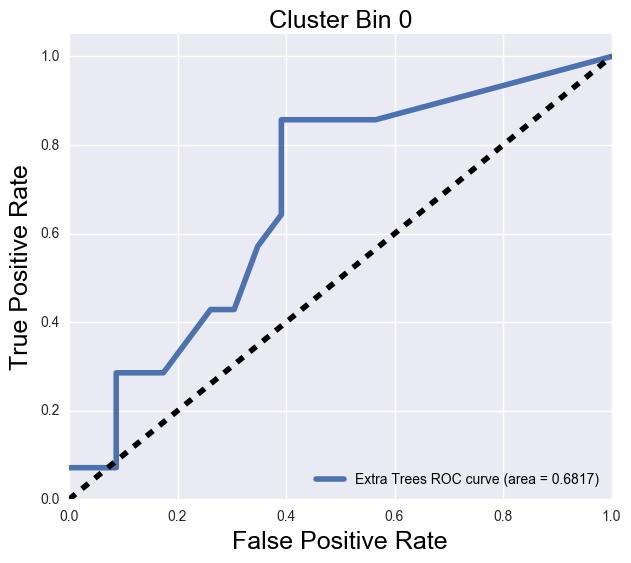

12 Number of items in bin


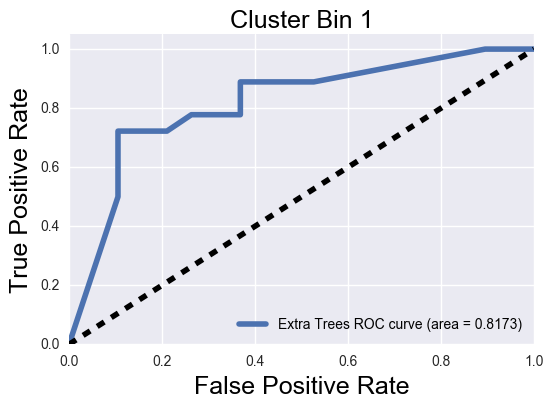

5 Number of items in bin


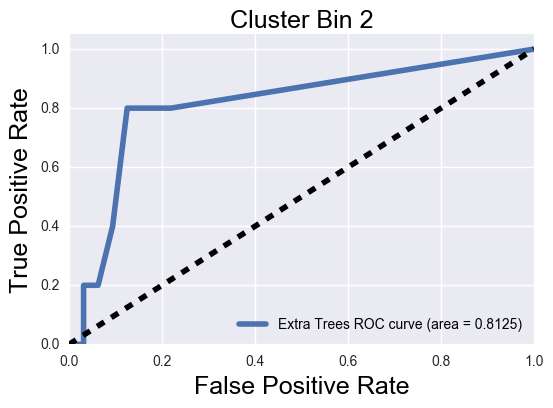

In [118]:
dfcopy=df.copy()
dummy_df=pd.merge(df[["Total Flights","Departure Cancellations",u'Departure Diversions']],\
                  pd.get_dummies(dfcopy[["STATE"]]),\
                  left_index=True,right_index=True)#,"FAA REGION"
X=dummy_df
airports_copy=airports.copy()
cluster_number=3
y=df_3clusters["X1"].copy()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

model=RandomForestClassifier()
params={'n_estimators':range(12,18),"max_depth":range(5,13),}
gs=GridSearchCV(model,params)
gs.fit(x_train,y_train)
rfc=RandomForestClassifier(n_estimators=gs.best_params_['n_estimators'],max_depth=gs.best_params_['max_depth'])
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print gs.best_params_
print confusion_matrix(y_test,pred)
print pd.DataFrame([[a,b] for a,b in zip(X.columns,rfc.feature_importances_)],columns=["Feature","Importance"]).\
                    sort_values("Importance",ascending=False).head(8)

probs=[rfc.predict_proba(x_test),"Random Forest"]

# gb=GradientBoostingClassifier()
# gb.fit(x_train,y_train)
# pred=gb.predict(x_test)
# print confusion_matrix(y_test,pred)
# probs=[gb.decision_function(x_test),"Gradient Boosting"]
# print pd.DataFrame([[a,b] for a,b in zip(X.columns,gb.feature_importances_)],columns=["Feature","Importance"]).\
#                     sort_values("Importance",ascending=False).head(8)


et=ExtraTreesClassifier()
et.fit(x_train,y_train)
pred=et.predict(x_test)
print confusion_matrix(y_test,pred)
probs=[et.predict_proba(x_test),"Extra Trees"]
print pd.DataFrame([[a,b] for a,b in zip(X.columns,et.feature_importances_)],columns=["Feature","Importance"]).\
                    sort_values("Importance",ascending=False).head(8)

print accuracy_score(y_test,pred)

if cluster_number==3:
    prob0=0.
    prob1=0.
    prob2=0.
    acc_score=0.
    arrays=np.linspace(-.30,.30,31)
#     arrays[0]=0
    for a in arrays:
        for b in arrays:
            for c in arrays:
                predcopy=[]
                for row in probs[0]:
                    temp=[row[0]+a,row[1]+b,row[2]+c]
                    if temp[0]==max(temp):
                        predcopy.append(0)
                    elif temp[1]==max(temp):
                        predcopy.append(1)
                    elif temp[2]==max(temp):
                        predcopy.append(2)
                    else:
                        predcopy.append(3)
    #             print accuracy_score(y_test,predcopy)
                if acc_score<accuracy_score(y_test,predcopy):
                    acc_score=accuracy_score(y_test,predcopy)
                    prob0=a
                    prob1=b
                    prob2=c
                    print acc_score
                    pred=predcopy
else:
    prob0=0.
    prob1=0.
    prob2=0.
    prob3=0.
    acc_score=0.
    arrays=np.linspace(-.30,.30,31)
#     arrays[0]=0
    for a in arrays:
        for b in arrays:
            for c in arrays:
                for d in [0]:
                    predcopy=[]
                    for row in probs[0]:
                        temp=[row[0]+a,row[1]+b,row[2]+c,row[3]+d]
                        if temp[0]==max(temp):
                            predcopy.append(0)
                        elif temp[1]==max(temp):
                            predcopy.append(1)
                        elif temp[2]==max(temp):
                            predcopy.append(2)
                        else:
                            predcopy.append(3)
#                     print accuracy_score(y_test,predcopy)
                    if acc_score<accuracy_score(y_test,predcopy):
                        acc_score=accuracy_score(y_test,predcopy)
                        prob0=a
                        prob1=b
                        prob2=c
                        prob3=d
                        print acc_score
                        pred=predcopy

print confusion_matrix(y_test,pred)            
print prob0,prob1,prob2

airports_copy=df.copy()
airports_copy["Cluster Results"]=pd.DataFrame(pred,columns=["Cluster Results"])
                                        #[num for num in df_3clusters["X0"]]
airports_copy=airports_copy[pd.notnull(airports_copy["Cluster Results"])]
airports_copy["Departure Diversions/Cancellations"]=airports_copy["Departure Diversions"]/\
            airports_copy["Departure Cancellations"]
airports_copy["Departure Cancellations/Total Flights"]=airports_copy["Departure Cancellations"]/\
            airports_copy["Total Flights"]


plt.figure(figsize=[7,6])
labels=["Cluster"]
for j in range(cluster_number):
    print "%x Number of items in bin"%sum(1 for delta in y_test if delta==j)
    FPR, TPR, _ = roc_curve(y_test, [i[j] for i in probs[0]],pos_label=j)
    ROC_AUC = auc(FPR, TPR)
    plt.plot(FPR, TPR, label=probs[1]+' ROC curve (area = %0.4f)' % ROC_AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.title(["Cluster Bin %x" %j][0], fontsize=18, color='black')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18, color='black')
    plt.ylabel('True Positive Rate', fontsize=18, color='black')
    l=plt.legend(loc="lower right")
    for text in l.get_texts():
        text.set_color("black")
    plt.show()

# sns.barplot("FAA REGION","Cluster Results",data=airports_copy)
# plt.show()
# plt.subplots(figsize=(10,8))
# plt.scatter(airports_copy["Total Flights"],airports_copy["Departure Cancellations"],\
#               c=airports_copy["Cluster Results"],cmap='hot')
# plt.show()
# sns.jointplot(airports_copy["Total Flights"],airports_copy["Cluster Results"])
# plt.show()
# colstoplot=[u'Departure Cancellations',
#                      u'Departure Diversions',
#                             "Total Flights"]
# for col in colstoplot:
#     for col2 in colstoplot:
#         plt.scatter(airports_copy[col],airports_copy[col2],c=airports_copy["Cluster Results"],cmap='hot')
#         plt.xlabel(col)
#         plt.ylabel(col2)
#         plt.show()

# airports_copy[pd.notnull(airports_copy["Cluster Results"])].sort_values("Cluster Results")

### Part 7: Write an analysis plan of your findings 

Create a writeup on the interpretation of findings including an executive summary with conclusions and next steps. Put it on your blog, and include the link here.

In this project, I used operational delay data to artifically group airports. From these groupings, I ran classifiers to select the appropriate scaling of data and appropriate number of clusters. After selecting these criteria, I then grouped the airports by the corresponding category labels. From these groupings, we have uncovered three categories of airports: 

    1) Poorly performing airports
    2) Decently performing airports
    3) Well performing airports
    
My airport groupings compared to real world sentiment demonstrate that our process was effective. 

[For additional analysis, please regard the markdown cells in the appropriate sections above.] 

Which operational features are most correlated with delays?

A: Poor funding, poor weather, and large size. Keep in mind, small airports that have a lot of traffic will likely have large delays in poor weather. For example, HPN, the airport in White Plain, NY, is one that I fly out of frequently. Usually, it is extremely quick. However, in winter conditions and bad weather, there are heavy delays necessarily for one specific reason. HPN rarely cancels its flights. From my experience, flights to JFK, Laguardia, and Newark get cancelled, but the HPN flights never do. So, HPN is actually a preferable place to fly as the delays are not a fair representation of the airport's performance. So, this model is really only valid for mid to large sized airports.

What should the airport's next steps be?

A: Not all airports have poor funding, but for those that do, increase it.

### Bonus: Copy your Database to AWS 

Make sure to properly document all of the features of your dataset

### Bonus: Create a 3-Dimensional Plot of your new dataset with PCA applied